<a href="https://colab.research.google.com/github/mH-13/Machine-Learning-and-AI/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn import datasets

# For splitting data into groups
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# For modeling functions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as XGB
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Data Visualize
import matplotlib.pyplot as plt
# from plotnine import *
import seaborn as sns
# Stats from SciPy
from scipy import stats




---


---


# 1. Initial Informations

#### By the shape of the two datasets, there's one less column in Test dataset than the Train dataset which is the target variable "SalePrice".

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot: >

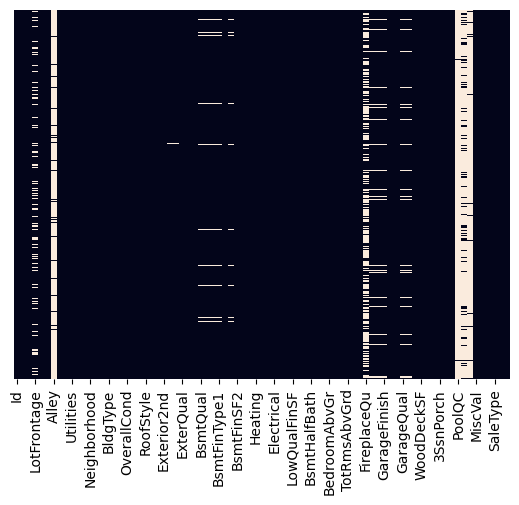

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [ ]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot: >

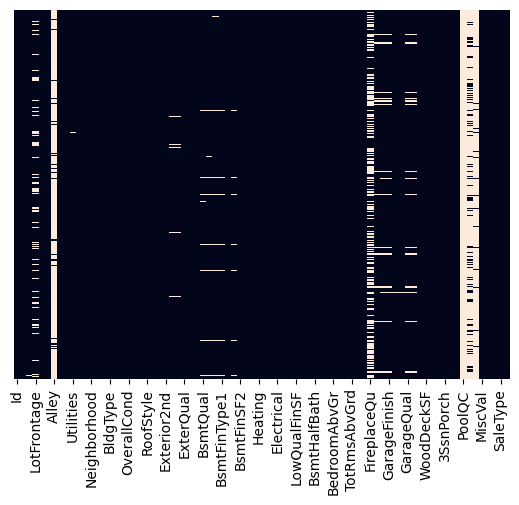

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

## 1.1 Missing Values

#### From the information we see some of the columns has missing values. So, returning the number of missing values. Also, before applying feature engineering, we should check if both the datasets has the same feature variables or columns.

#### Inclulding the drop of the ID column in both datasets before performing numerical and categorical features, just saving the test ID for prediction later on.

In [ ]:
# Checking whether both train and test has same features
check_test = [var for var in test.columns if var not in train.columns]
print("Columns in test not common with train:", check_test)

check_train = [var for var in train.columns if var not in test.columns]
print("Columns in train not common with test:", check_train)

Columns in test not common with train: []
Columns in train not common with test: ['SalePrice']


In [ ]:
# Drop ID columns
train.drop(columns = ["Id"], axis = 1, inplace = True)

# Drop ID columns in test and save it for future prediction
Test_ID = test['Id'].tolist() #used to convert the data elements of an array into a list.
test.drop(columns = ['Id'], axis = 1, inplace = True)

train.shape, test.shape

((1460, 80), (1459, 79))

After the common feature check, we checked fro null values and found few of the columns have some null values. We do not remove it entirely, we just replace it with the mean value of it (for both train and test data).




---



---

## Train values

In [ ]:
print(train.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64




---



---

## Test Values

In [ ]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

<AxesSubplot: >

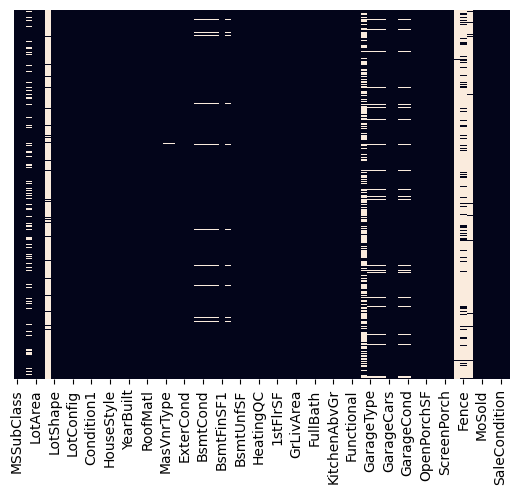

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot: >

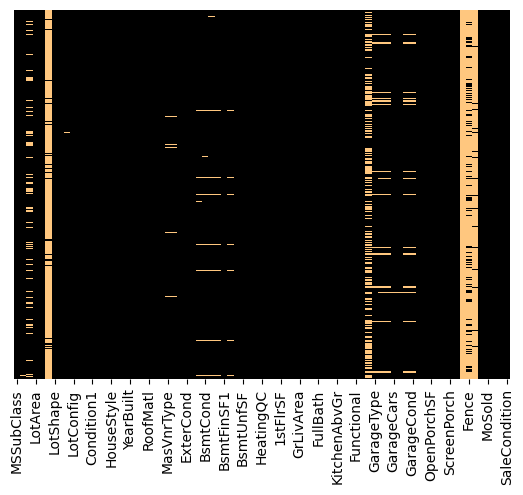

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='copper')

## 1.2 Deadling with NAs
#### Looking at the datasets, we see that there are some NA value. The Alley, FireplaceQU and more features has NA value, we can assume that perhaps there are no Alley and so on. So, we can fill those cells with None.

In [ ]:
NA = ['Alley', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'FireplaceQu', 'GarageFinish','GarageQual', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'MSZoning', 'GarageType', 'GarageCond']

for i in NA:
    train[i] = train[i].fillna('None')
    test[i] = test[i].fillna('None')

train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   None  None        None   
1         Lvl    AllPub       FR2  ...        0   None  None        None   
2         Lvl    AllPub    Inside  ...        0   None  None        None   
3         Lvl    AllPub    Corner  ...        0   None  None        None   
4         Lvl    AllPub       FR2  ...        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

<AxesSubplot: >

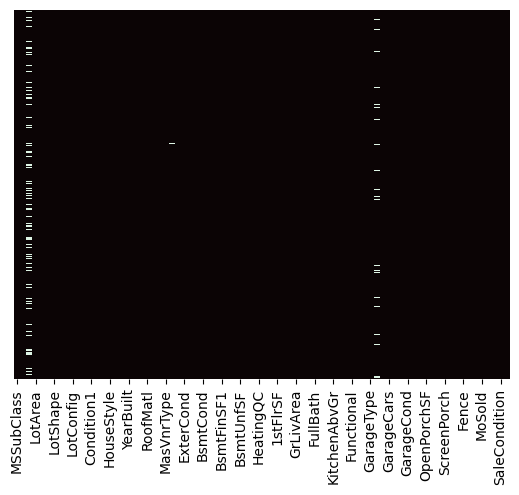

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='mako')

<AxesSubplot: >

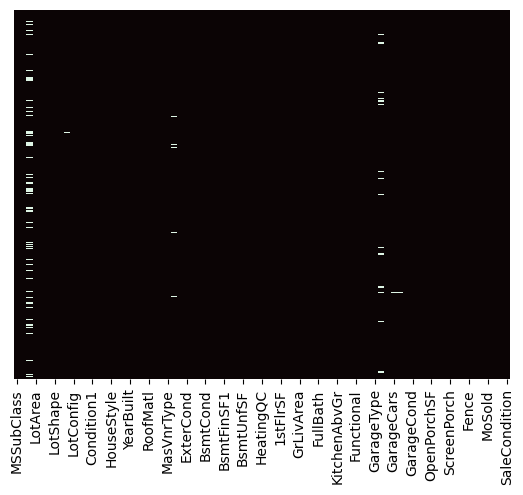

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='mako')

<AxesSubplot: >

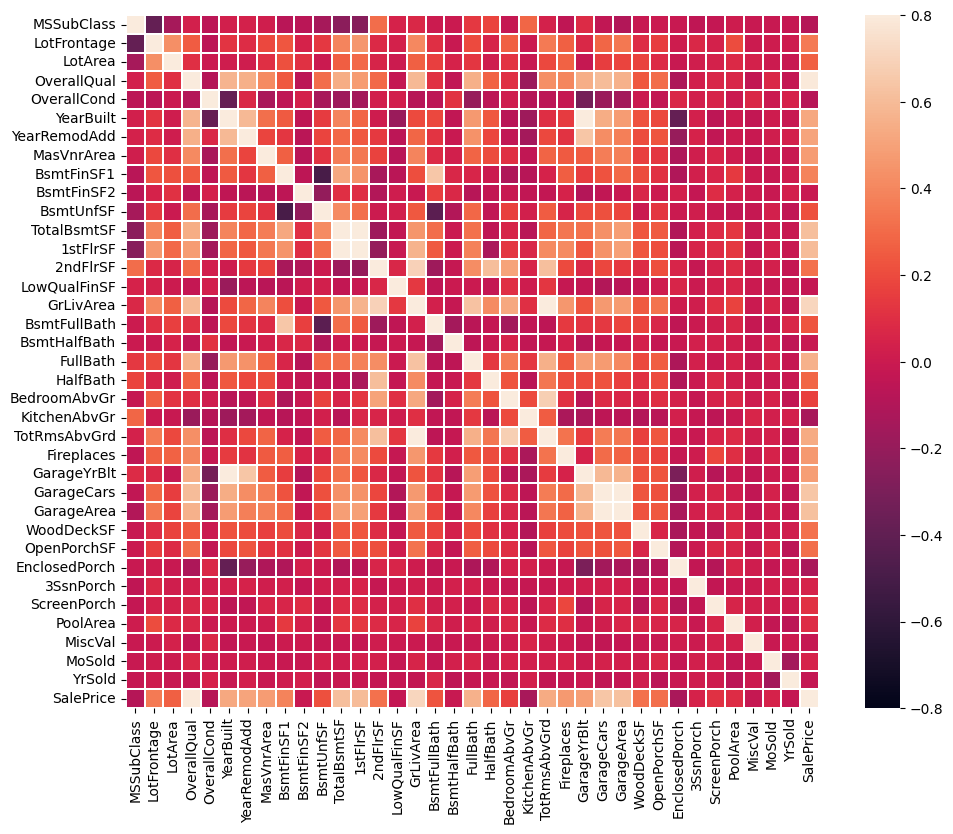

In [ ]:
corr_train = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Mask the upper part of the heatmap
# mask = np.triu(np.ones_like(corr_train, dtype = bool))
sns.heatmap(corr_train, vmax = .8, vmin = -.8, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True)

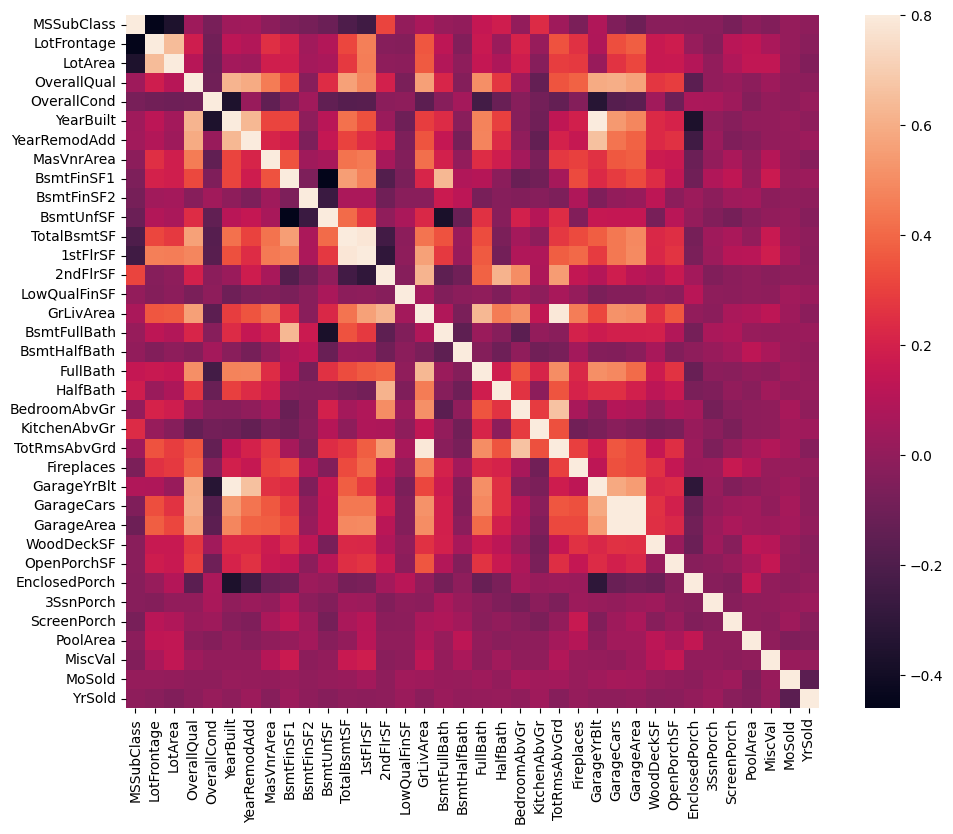

In [ ]:
corr_test = test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_test, vmax = .8, square = True);

In [ ]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

# 2. Data Exploration

#### Initial Correlation to check the impacts with SalePrice

In [ ]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[:28]

SalePrice        1.000000
OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
Name: SalePrice, dtype: float64

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#### Exploratory data analysis to look to anomalies.

In [ ]:
def plotting_chart(df, feature):
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating customized chart
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    ## Grid of 3 cols and 3 rows
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ## Customized histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    # plot histogram
    sns.distplot(df.loc[:,feature], norm_hist = True, ax = ax1)



    ## Customized QQ_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    # plot histogram
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customized boxplot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient = 'v', ax = ax3)

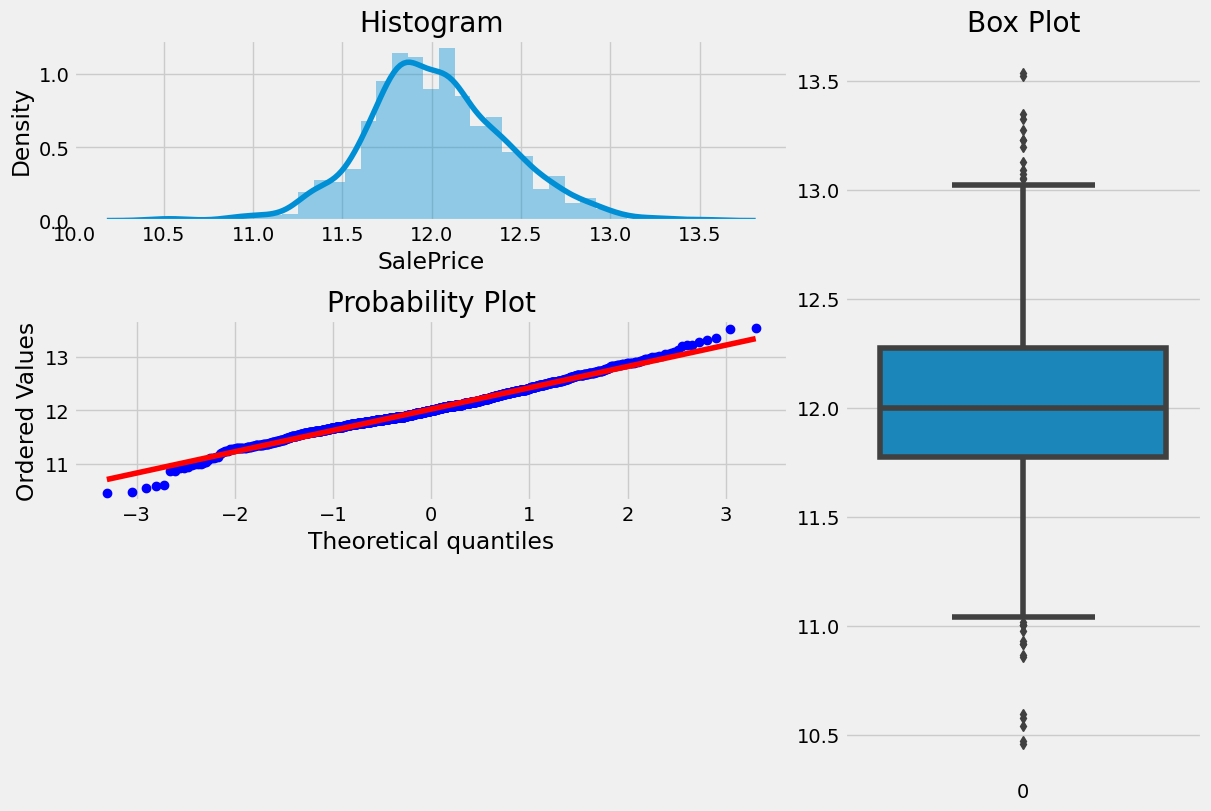

In [ ]:
plotting_chart(train, 'SalePrice')

# 3. Numerical Data analyze

In [ ]:
# All the number columns
train_num = train.select_dtypes(include = [np.number])
test_num = test.select_dtypes(include = [np.number])

train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247699  
1       5    2007  12.109016  
2       9    2008  12.317171  
3       2    2006  11.849405  
4      12    2008  12.429220  

[5 rows x 37 columns]

In [ ]:
train_numeric = [col for col in train.columns if train[col].dtypes != 'object']
print("Numeric Features:", train_numeric)
print(f"\nTotal Numeric Features: {len(train_numeric)}")

Numeric Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Total Numeric Features: 37


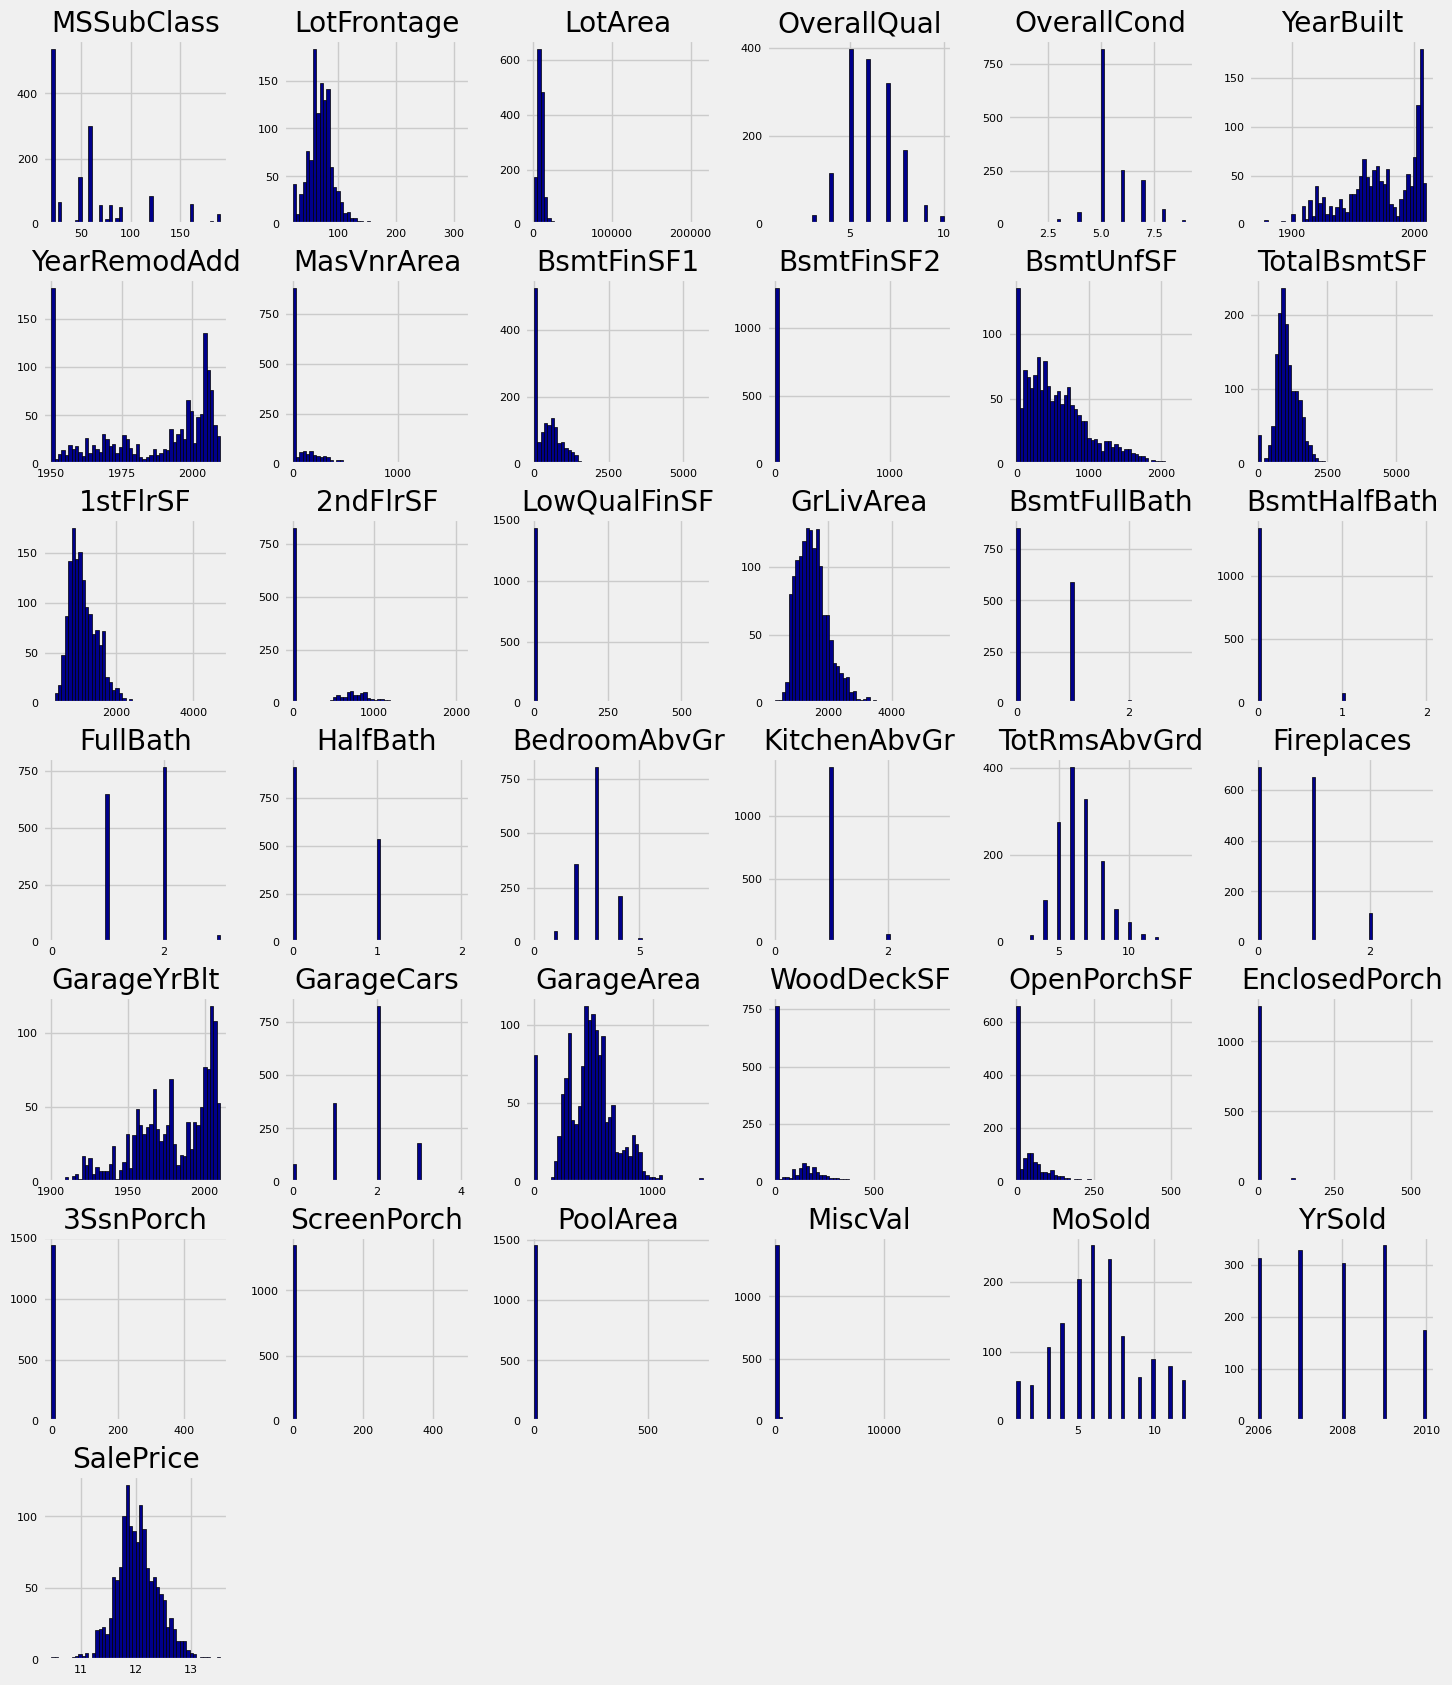

In [ ]:
# Plot the distribution of all the numerical features
fig_ = train_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

## 3.1 Quasi Constant Feature
#### We will get rid of the similar or constant values as these will have small impact on the final result (price of house).

In [ ]:
# Dropping Quasi Constant Feature which has 97% similar or constant value
selector = VarianceThreshold(threshold = 0.07)
sel = selector.fit(train_num.iloc[:, :-1]) # excludes the last column
sel_index = sel.get_support() # mask that can be applied

print(f"Number of features to be keeped: {sum(sel_index)}\n")
quasi_features = len(train_num.iloc[:, :-1].columns) - sum(sel_index)
print(f"Number of quasi_constant features: {quasi_features}")

QC_features_list = [x for x in train_num.iloc[:, :-1].columns
                        if x not in train_num.iloc[:, :-1].columns[sel_index]]
print(f"\nQuasi-constant features to be dropped: {QC_features_list}")

Number of features to be keeped: 34

Number of quasi_constant features: 2

Quasi-constant features to be dropped: ['BsmtHalfBath', 'KitchenAbvGr']


#### We got two constant variables, and these will be removed

In [ ]:
train_num.drop(QC_features_list, axis = 1, inplace = True)
test_num.drop(QC_features_list, axis = 1, inplace = True)

train_num.shape, test_num.shape

((1460, 35), (1459, 34))

In [ ]:
# Checking whether both train and test has same features
check_test = [var for var in test_num.columns if var not in train_num.columns]
print("Columns in test not common with train:", check_test)

check_train = [var for var in train_num.columns if var not in test_num.columns]
print("Columns in train not common with test:", check_train)

Columns in test not common with train: []
Columns in train not common with test: ['SalePrice']


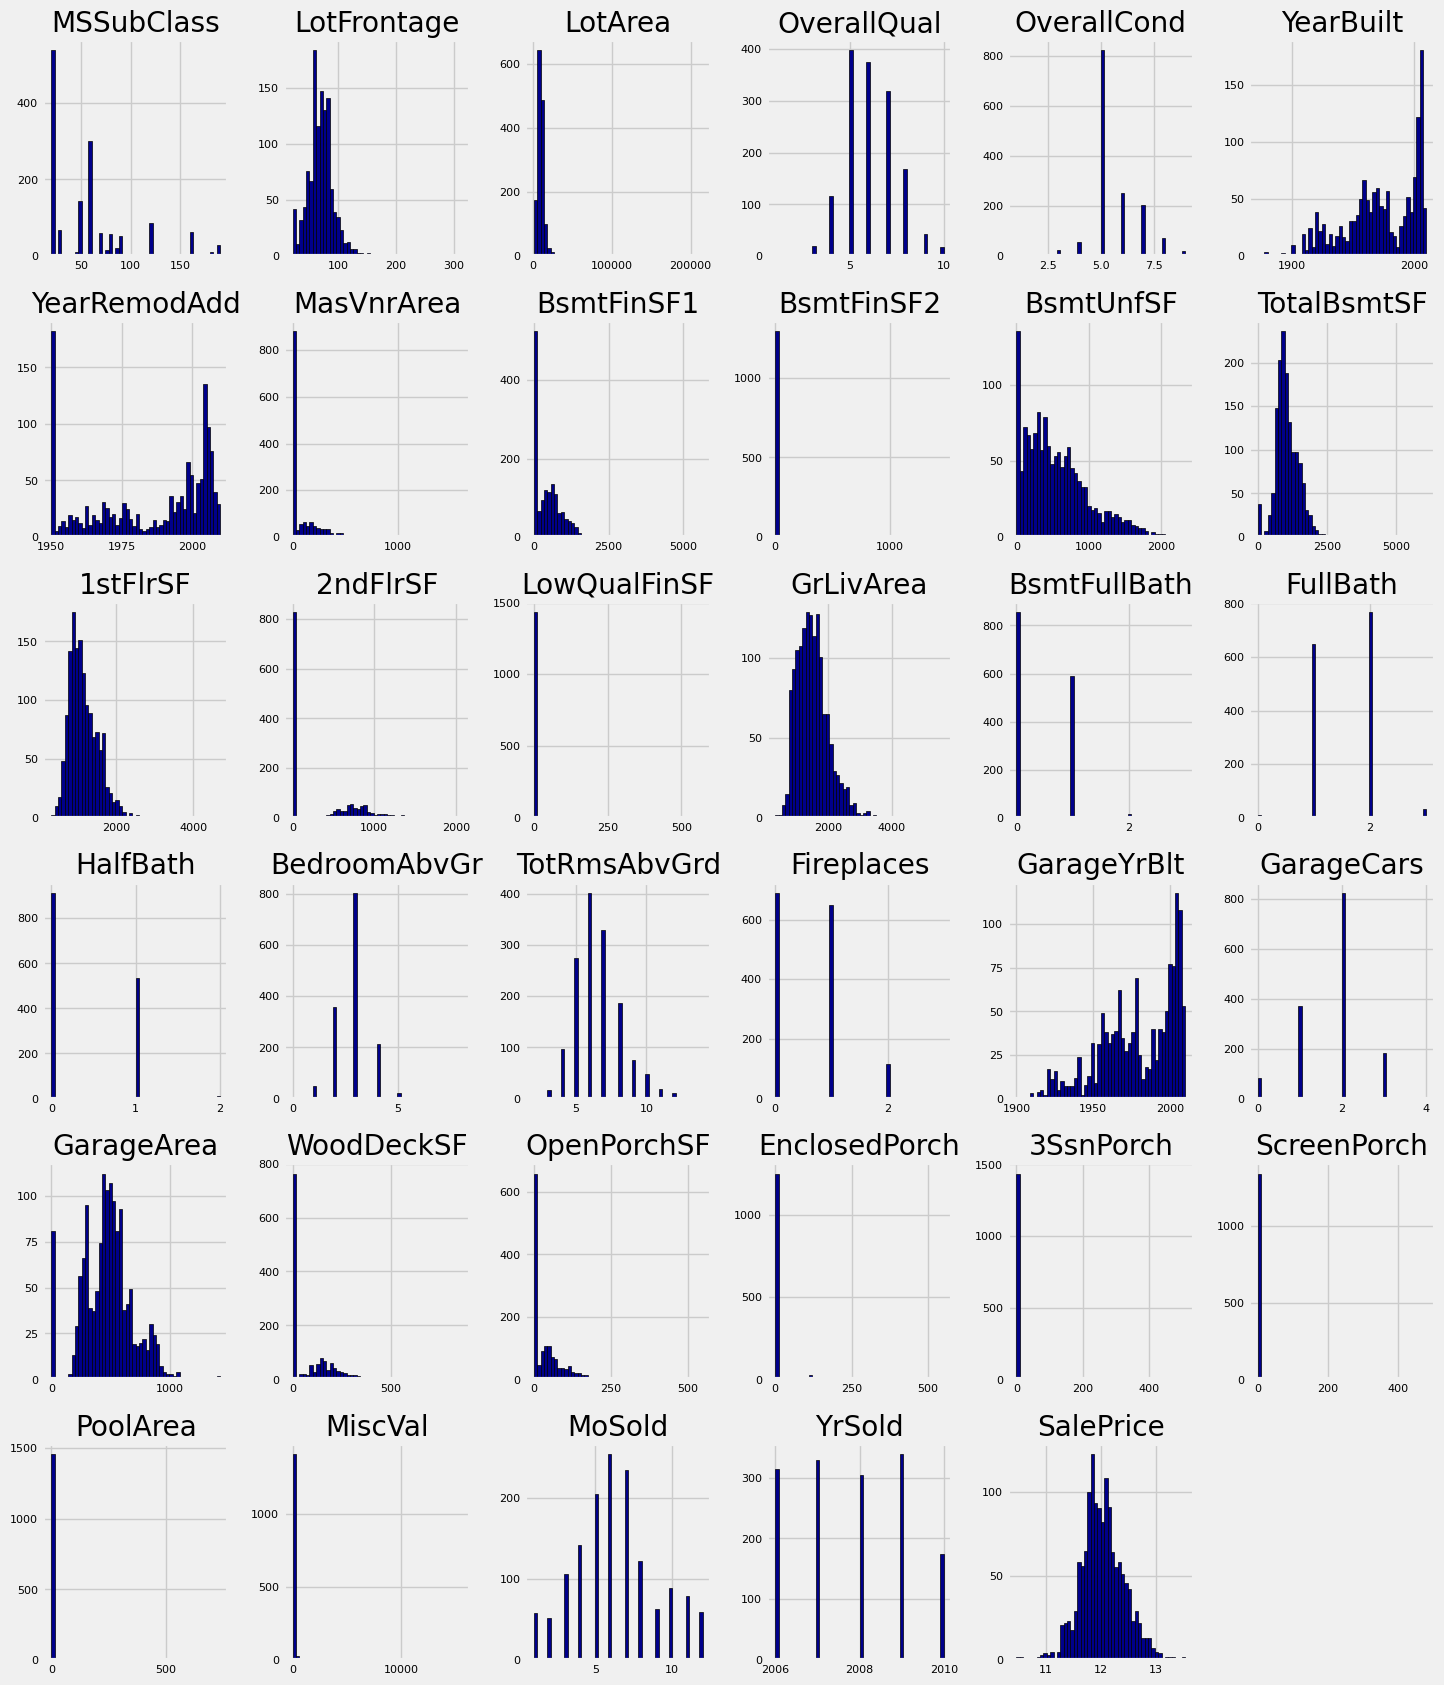

In [ ]:
fig_ = train_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

## 3.2 Correlation of Numerical Features with 'SalePrice'
#### Correlation after dropping quasi constants

In [ ]:
(train_num.corr())["SalePrice"].sort_values(ascending = False)[:28]

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
MasVnrArea      0.430809
BsmtFinSF1      0.372023
LotFrontage     0.355879
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
HalfBath        0.313982
LotArea         0.257320
BsmtFullBath    0.236224
BsmtUnfSF       0.221985
BedroomAbvGr    0.209043
ScreenPorch     0.121208
PoolArea        0.069798
MoSold          0.057330
3SsnPorch       0.054900
Name: SalePrice, dtype: float64

### Heatmap for remaining numerical data
For now, will neglect the low correlation varible with "SalePrice" as those will not have a huge impact on the final result. So, replacing those values with 0s.

<AxesSubplot: >

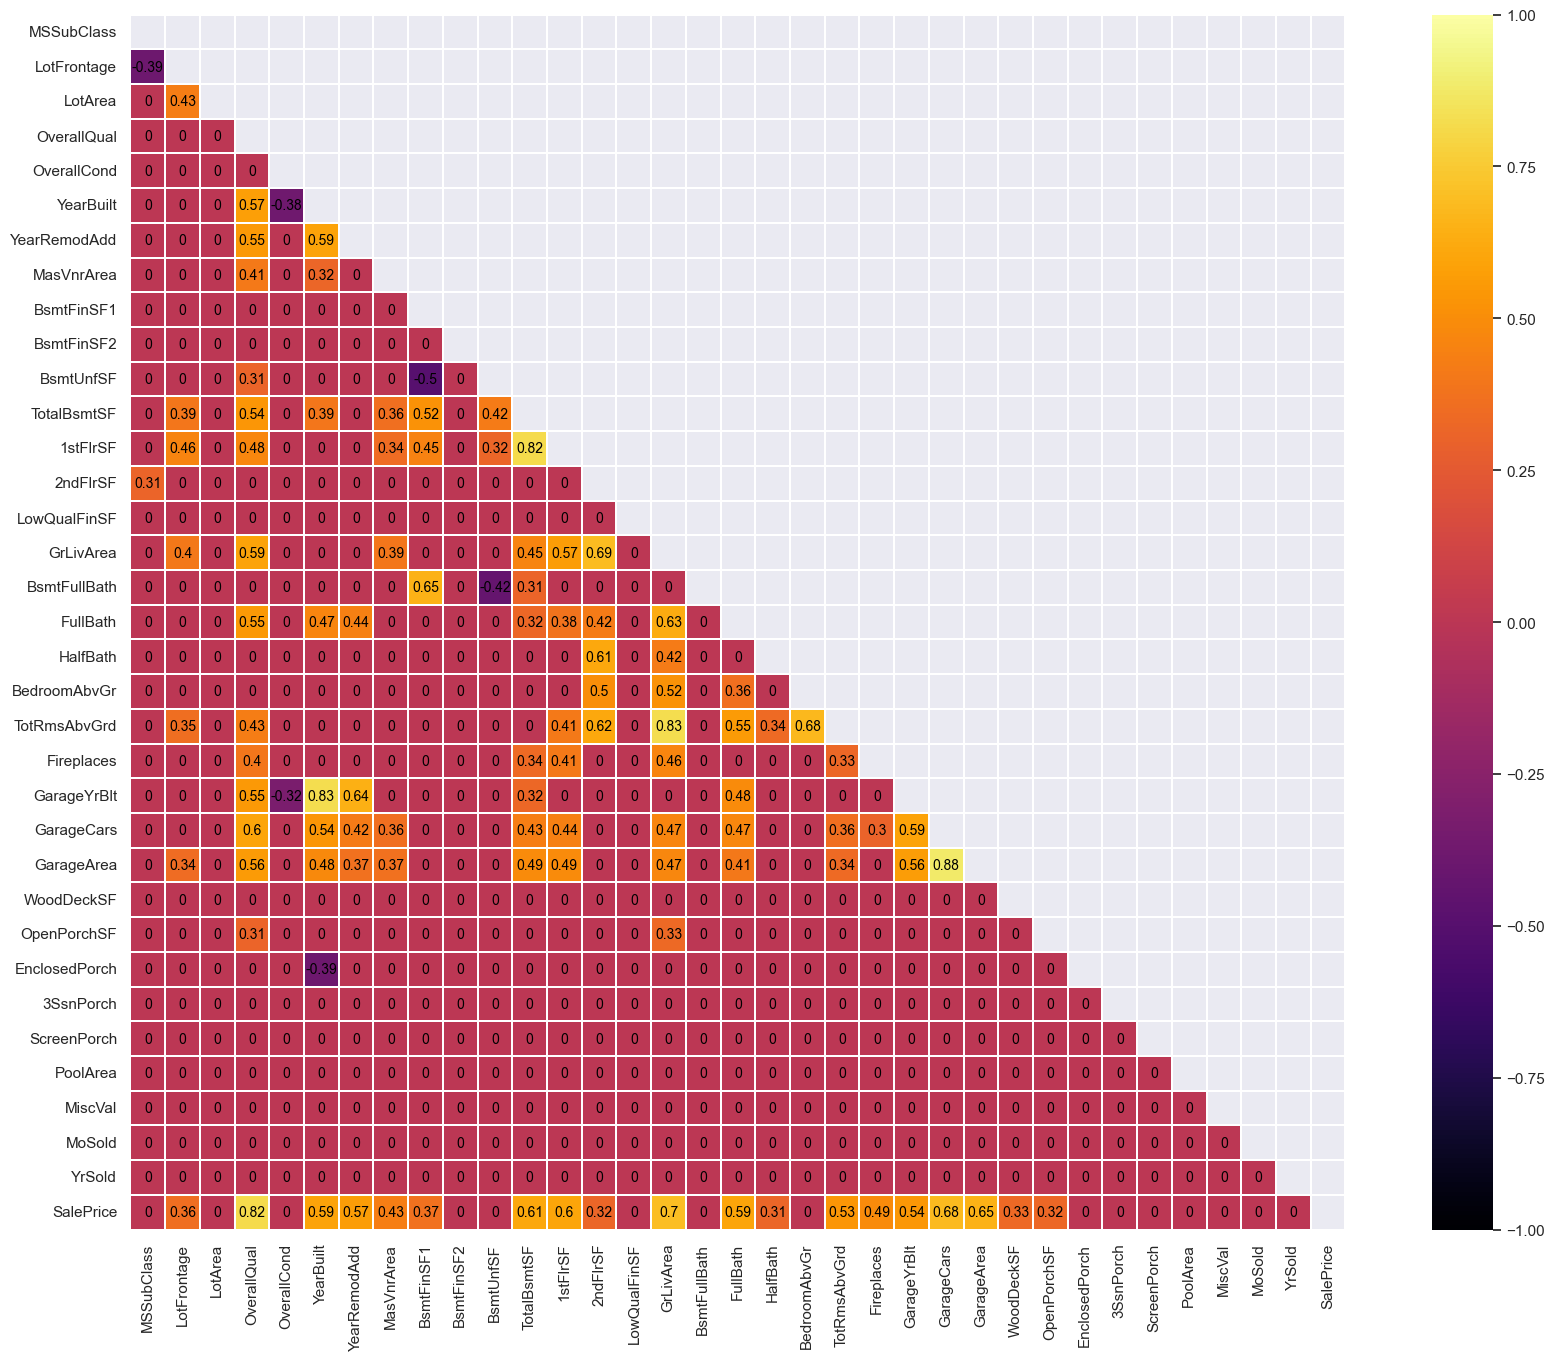

In [ ]:
corr_matrix = train_num.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0


# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

cmap = "inferno"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True, cmap = cmap, annot = True)

In [ ]:
corr_data = (train_num.corr())["SalePrice"].sort_values(ascending = False)
corr_data

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.70
GarageCars       0.68
GarageArea       0.65
TotalBsmtSF      0.61
1stFlrSF         0.60
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
GarageYrBlt      0.54
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.37
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
MiscVal         -0.02
OverallCond     -0.04
YrSold          -0.04
LowQualFinSF    -0.04
MSSubClass      -0.07
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64

In [ ]:
corr_data_with_SalePrice = train_num.corr()["SalePrice"][:-1] # Leaving out SalePrice

high_corr_list = (corr_data_with_SalePrice[abs(corr_data_with_SalePrice) >= 0.5].sort_values(ascending = False).round(2))
low_corr_list = (corr_data_with_SalePrice[(abs(corr_data_with_SalePrice) < 0.5) & (abs(corr_data_with_SalePrice) > 0.3)].sort_values(ascending = False).round(2))


print(f"{len(high_corr_list)} high correlated values with SalePrice:\n{high_corr_list}\n")
print(f"{len(low_corr_list)} low correlated values with SalePrice:\n{low_corr_list}\n")

11 high correlated values with SalePrice:
OverallQual    0.82
GrLivArea      0.70
GarageCars     0.68
GarageArea     0.65
TotalBsmtSF    0.61
1stFlrSF       0.60
FullBath       0.59
YearBuilt      0.59
YearRemodAdd   0.57
GarageYrBlt    0.54
TotRmsAbvGrd   0.53
Name: SalePrice, dtype: float64

8 low correlated values with SalePrice:
Fireplaces    0.49
MasVnrArea    0.43
BsmtFinSF1    0.37
LotFrontage   0.36
WoodDeckSF    0.33
OpenPorchSF   0.32
2ndFlrSF      0.32
HalfBath      0.31
Name: SalePrice, dtype: float64



In [ ]:
poor_corr_list = (corr_data_with_SalePrice[abs(corr_data_with_SalePrice) < 0.3].sort_values(ascending = False).round(2))
print(f"{len(poor_corr_list)} poor correlated values with SalePrice:\n{poor_corr_list}\n")

15 poor correlated values with SalePrice:
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
MiscVal         -0.02
OverallCond     -0.04
YrSold          -0.04
LowQualFinSF    -0.04
MSSubClass      -0.07
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64



#### Features with poor correlation with 'SalePrice' will be dropped as they have almost no linear relation with the target variable.

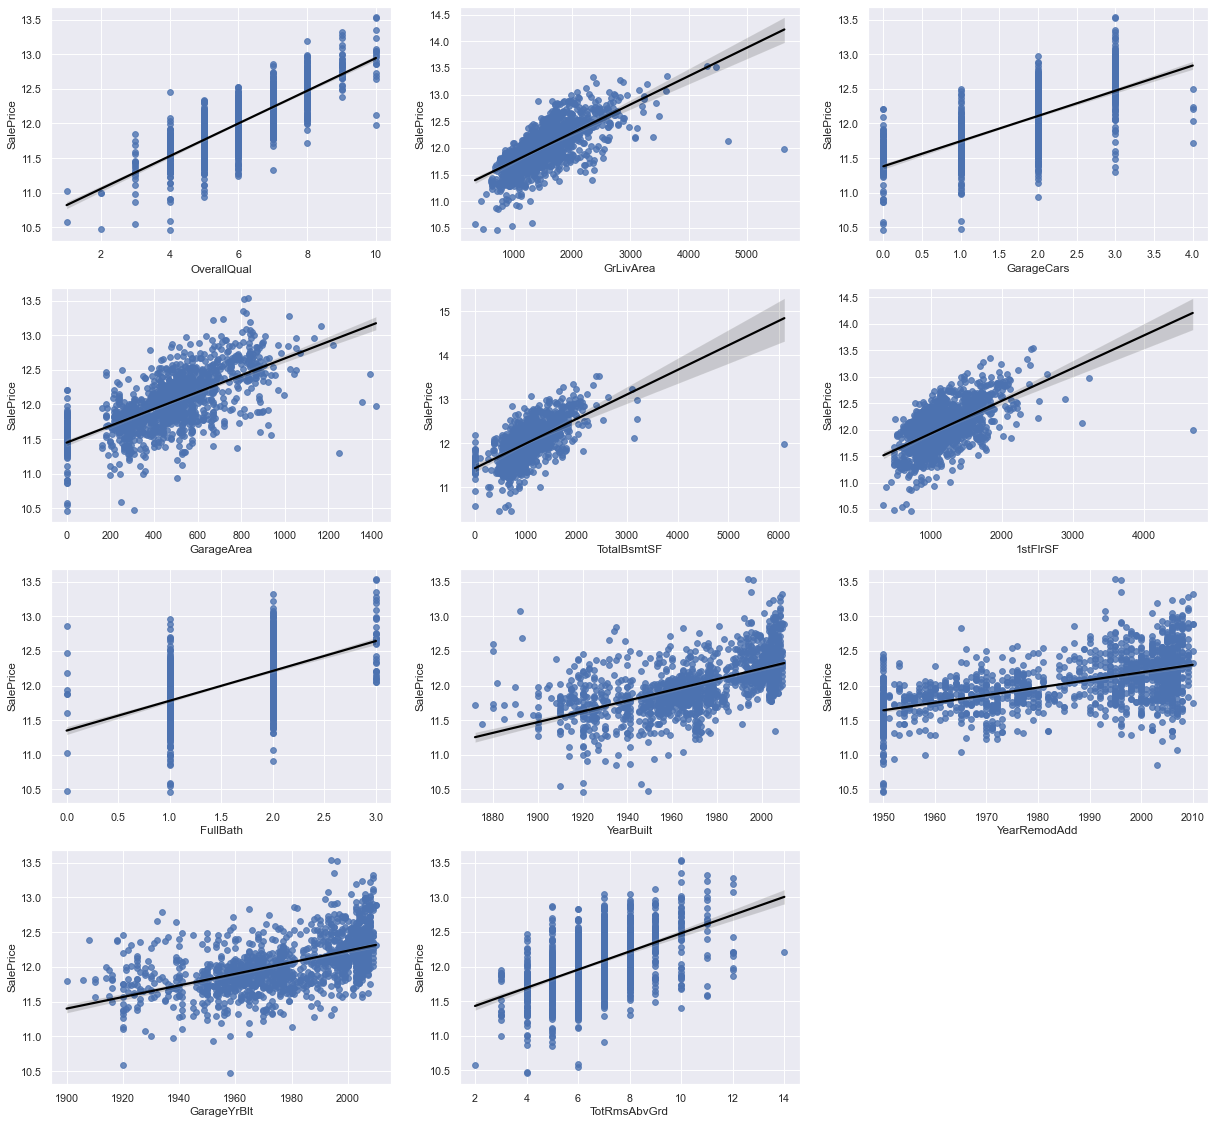

In [ ]:
# High features
high_features = corr_data_with_SalePrice[corr_data_with_SalePrice >= 0.5].sort_values(ascending = False).index

HF_list = [i for i in high_features]
HF_list.append("SalePrice")


def reg_plot(df, features, rows, col):
    fig = plt.figure(figsize = (19,19), dpi = 70)
    for i, feature in enumerate(features):
        if feature != 'SalePrice':
            ax = fig.add_subplot(rows, col, i+1)
            sns.regplot(x = feature, y = 'SalePrice', data = df, line_kws = {'color':'black'})
            ax.set_xlabel(feature)
            ax.set_ylabel('SalePrice')

reg_plot(train[HF_list], HF_list, 4, 3)

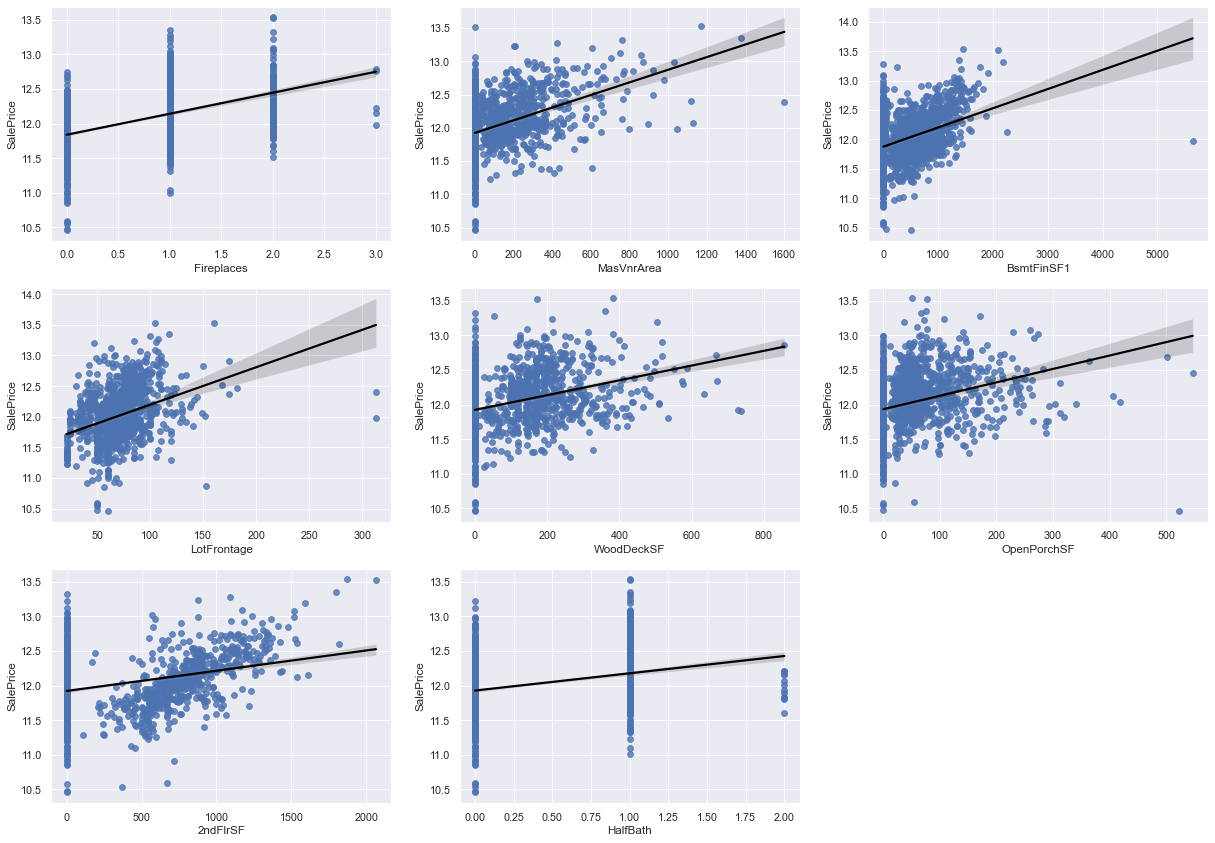

In [ ]:
# High features
low_features = corr_data_with_SalePrice[(corr_data_with_SalePrice < 0.5) & (corr_data_with_SalePrice > 0.3)].sort_values(ascending = False).index

LF_list = [i for i in low_features]
LF_list.append("SalePrice")


def reg_plot(df, features, rows, col):
    fig = plt.figure(figsize = (19,19), dpi = 70)
    for i, feature in enumerate(features):
        if feature != 'SalePrice':
            ax = fig.add_subplot(rows, col, i+1)
            sns.regplot(x = feature, y = 'SalePrice', data = df, line_kws = {'color':'black'})
            ax.set_xlabel(feature)
            ax.set_ylabel('SalePrice')

reg_plot(train[LF_list], LF_list, 4, 3)

## 3.3 Multicollinearity amoung the numeric variables

#### Looking at the heatmap we see there are 4 pairs of multicollinear which are above 0.80, so we will drop each of these features from the pair.

1. "GarageArea" and "GarageCars" (0.88)
2. "GarageYrBlt" and "YearBuilt" (0.83)
3. "TotRmsAbvGrd" and "GrLivArea" (0.83)
4. "1stFlrSF" and "TotalBsmtSF" (0.82)

#### And will keep the rest of the numerical features

In [ ]:
numeric_features = list(high_corr_list.index) + list(low_corr_list.index)

numerical_drop = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF']
numerical_keep = [i for i in numeric_features if i not in numerical_drop]
numerical_keep.append('SalePrice')

print(f"Numerical feature to be kept:\n{numerical_keep}")

Numerical feature to be kept:
['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'SalePrice']


In [ ]:
train_numeric_update = train[numerical_keep]
numerical_keep.remove('SalePrice')

test_numeric_update = test[numerical_keep]

print(train_numeric_update.shape)
print(test_numeric_update.shape)

(1460, 16)
(1459, 15)


## 3.4 Numeric Train Data Set after data cleaning

### 3.4.1 Overall Distribution of Numeric Train Data Set

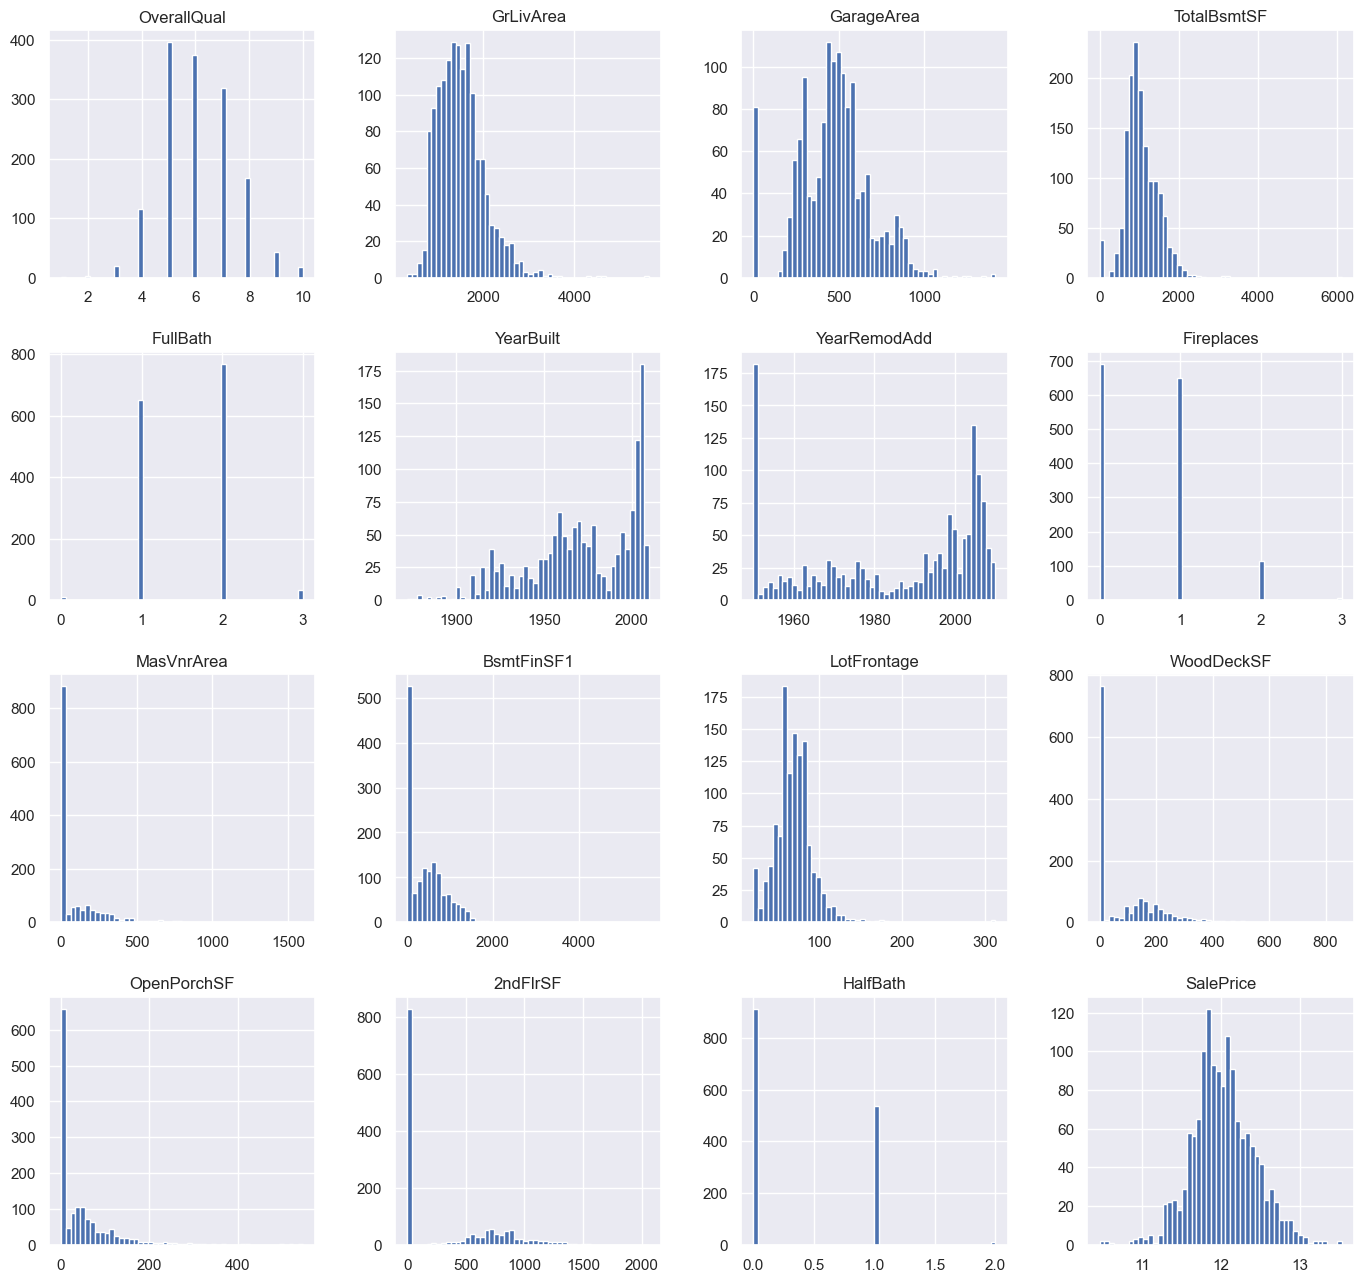

In [ ]:
train_numeric_update.hist(bins = 50, figsize = (15,15))
plt.show()

###  3.4.2 Missing values in numeric train data

Columns with missing values: ['MasVnrArea', 'LotFrontage']
Percentage missing values: MasVnrArea     0.55
LotFrontage   17.74
Name: Missing Values, dtype: float64


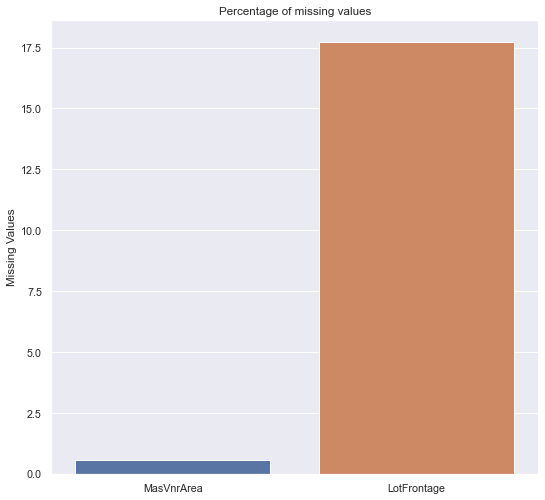

In [ ]:
missing_train = [col for col in train_numeric_update.columns if train_numeric_update[col].isnull().any()]
total_missing_train = pd.DataFrame(train_numeric_update[missing_train].isnull().sum(), columns = ['Missing Values'])
percentage_missing_train = ((total_missing_train['Missing Values'] * 100) / train_numeric_update.shape[0]).round(2)

print(f"Columns with missing values: {missing_train}")
print(f"Percentage missing values: {percentage_missing_train}")

plt.figure(figsize = (8,8), dpi = 70)
sns.set_style('darkgrid')
sns.barplot(x = total_missing_train.index, y = percentage_missing_train, data = total_missing_train)
plt.title('Percentage of missing values')
plt.show()

### 3.4.3 KNN Imputation of numeric train data

In [ ]:
imputer = KNNImputer(n_neighbors = 2)

imputed_train_numeric_update = pd.DataFrame(imputer.fit_transform(train_numeric_update))
imputed_train_numeric_update.columns = train_numeric_update.columns

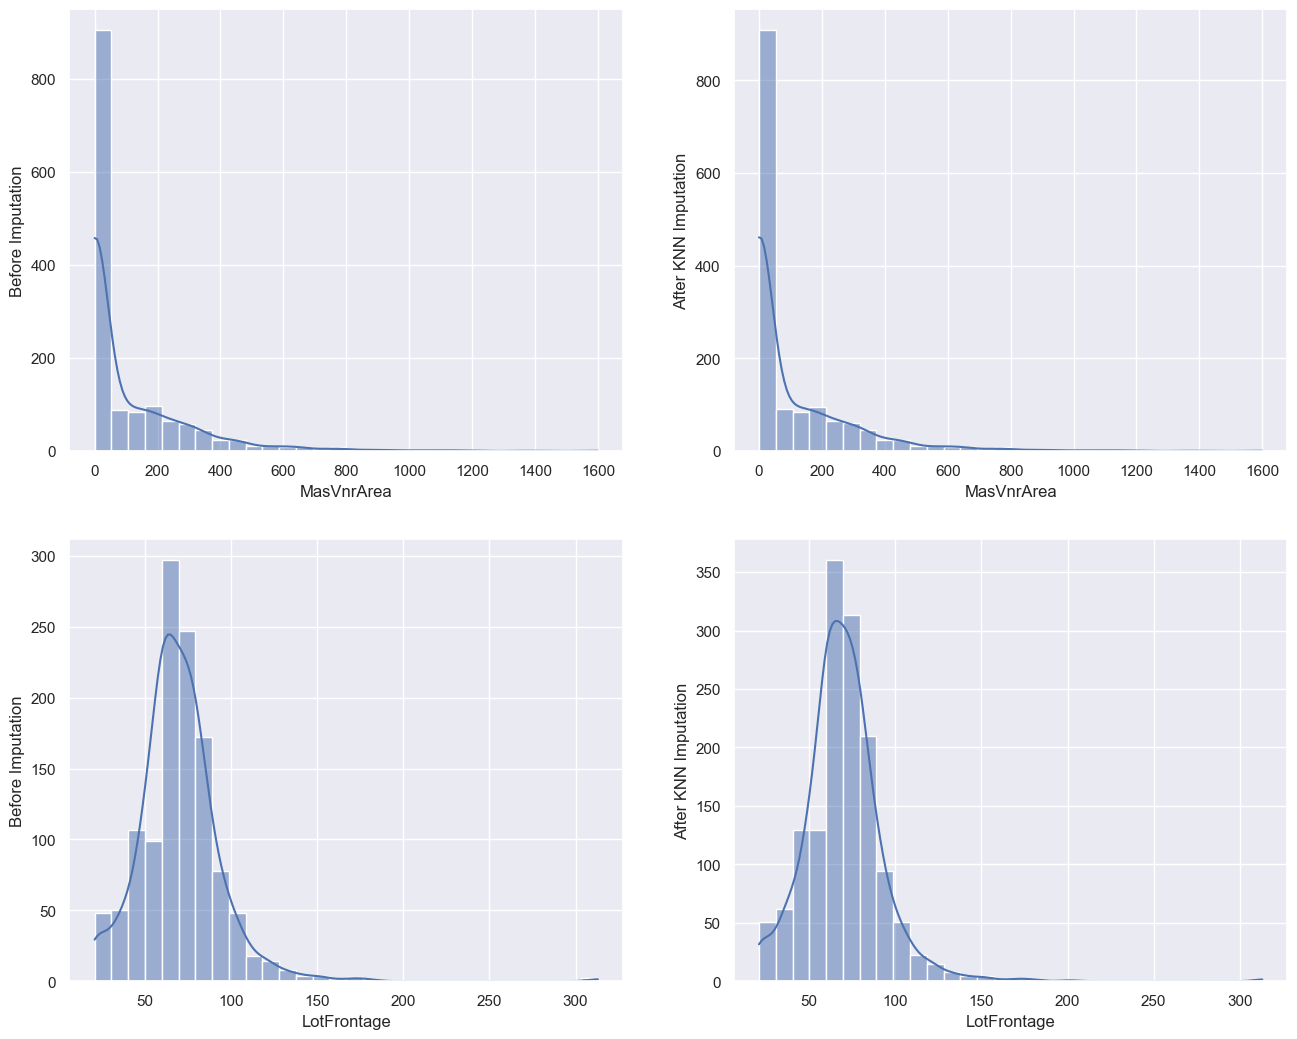

In [ ]:
sns.set(rc = {'figure.figsize':(14,12)})
fig, ax = plt.subplots(2, 2)

for pos, feature in enumerate(missing_train):
    sns.histplot(train_numeric_update[feature], bins = 30, kde = True, ax = ax[pos, 0])
    ax[pos, 0].set_ylabel('Before Imputation')

    sns.histplot(imputed_train_numeric_update[feature], bins = 30, kde = True, ax = ax[pos, 1])
    ax[pos, 1].set_ylabel('After KNN Imputation')

plt.show()

#### After the KNN Imputation, the 'LotFrontage' reveals a significant change in the distributed data. So, we will drop this feature from our numeric feature data.

In [ ]:
imputed_train_numeric_update.drop(['LotFrontage'], axis = 1,  inplace = True)
imputed_train_numeric_update.head()

OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0         7.00   1,710.00      548.00       856.00      2.00   2,003.00   
1         6.00   1,262.00      460.00     1,262.00      2.00   1,976.00   
2         7.00   1,786.00      608.00       920.00      2.00   2,001.00   
3         7.00   1,717.00      642.00       756.00      1.00   1,915.00   
4         8.00   2,198.00      836.00     1,145.00      2.00   2,000.00   

   YearRemodAdd  Fireplaces  MasVnrArea  BsmtFinSF1  WoodDeckSF  OpenPorchSF  \
0      2,003.00        0.00      196.00      706.00        0.00        61.00   
1      1,976.00        1.00        0.00      978.00      298.00         0.00   
2      2,002.00        1.00      162.00      486.00        0.00        42.00   
3      1,970.00        1.00        0.00      216.00        0.00        35.00   
4      2,000.00        1.00      350.00      655.00      192.00        84.00   

   2ndFlrSF  HalfBath  SalePrice  
0    854.00      1.00      12.25  
1      0.00      0.00      12.11  
2    866.00      1.00      12.32  
3    756.00      0.00      11.85  
4  1,053.00      1.00      12.43

#### To keep the shape equal we drop this feature from our test data

In [ ]:
test_numeric_update.drop(['LotFrontage'], axis = 1,  inplace = True)
test_numeric_update.head()

OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            5        896      730.00       882.00         1       1961   
1            6       1329      312.00     1,329.00         1       1958   
2            5       1629      482.00       928.00         2       1997   
3            6       1604      470.00       926.00         2       1998   
4            8       1280      506.00     1,280.00         2       1992   

   YearRemodAdd  Fireplaces  MasVnrArea  BsmtFinSF1  WoodDeckSF  OpenPorchSF  \
0          1961           0        0.00      468.00         140            0   
1          1958           0      108.00      923.00         393           36   
2          1998           1        0.00      791.00         212           34   
3          1998           1       20.00      602.00         360           36   
4          1992           0        0.00      263.00           0           82   

   2ndFlrSF  HalfBath  
0         0         0  
1         0         1  
2       701         1  
3       678         1  
4         0         0

In [ ]:
imputed_train_numeric_update.shape, test_numeric_update.shape

((1460, 15), (1459, 14))

## 3.5 Numeric Test Data Set after data cleaning

### 3.5.1 Overall Distribution of Numeric Test Data Set

In [ ]:
test_numeric_update.head()

OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            5        896      730.00       882.00         1       1961   
1            6       1329      312.00     1,329.00         1       1958   
2            5       1629      482.00       928.00         2       1997   
3            6       1604      470.00       926.00         2       1998   
4            8       1280      506.00     1,280.00         2       1992   

   YearRemodAdd  Fireplaces  MasVnrArea  BsmtFinSF1  WoodDeckSF  OpenPorchSF  \
0          1961           0        0.00      468.00         140            0   
1          1958           0      108.00      923.00         393           36   
2          1998           1        0.00      791.00         212           34   
3          1998           1       20.00      602.00         360           36   
4          1992           0        0.00      263.00           0           82   

   2ndFlrSF  HalfBath  
0         0         0  
1         0         1  
2       701         1  
3       678         1  
4         0         0

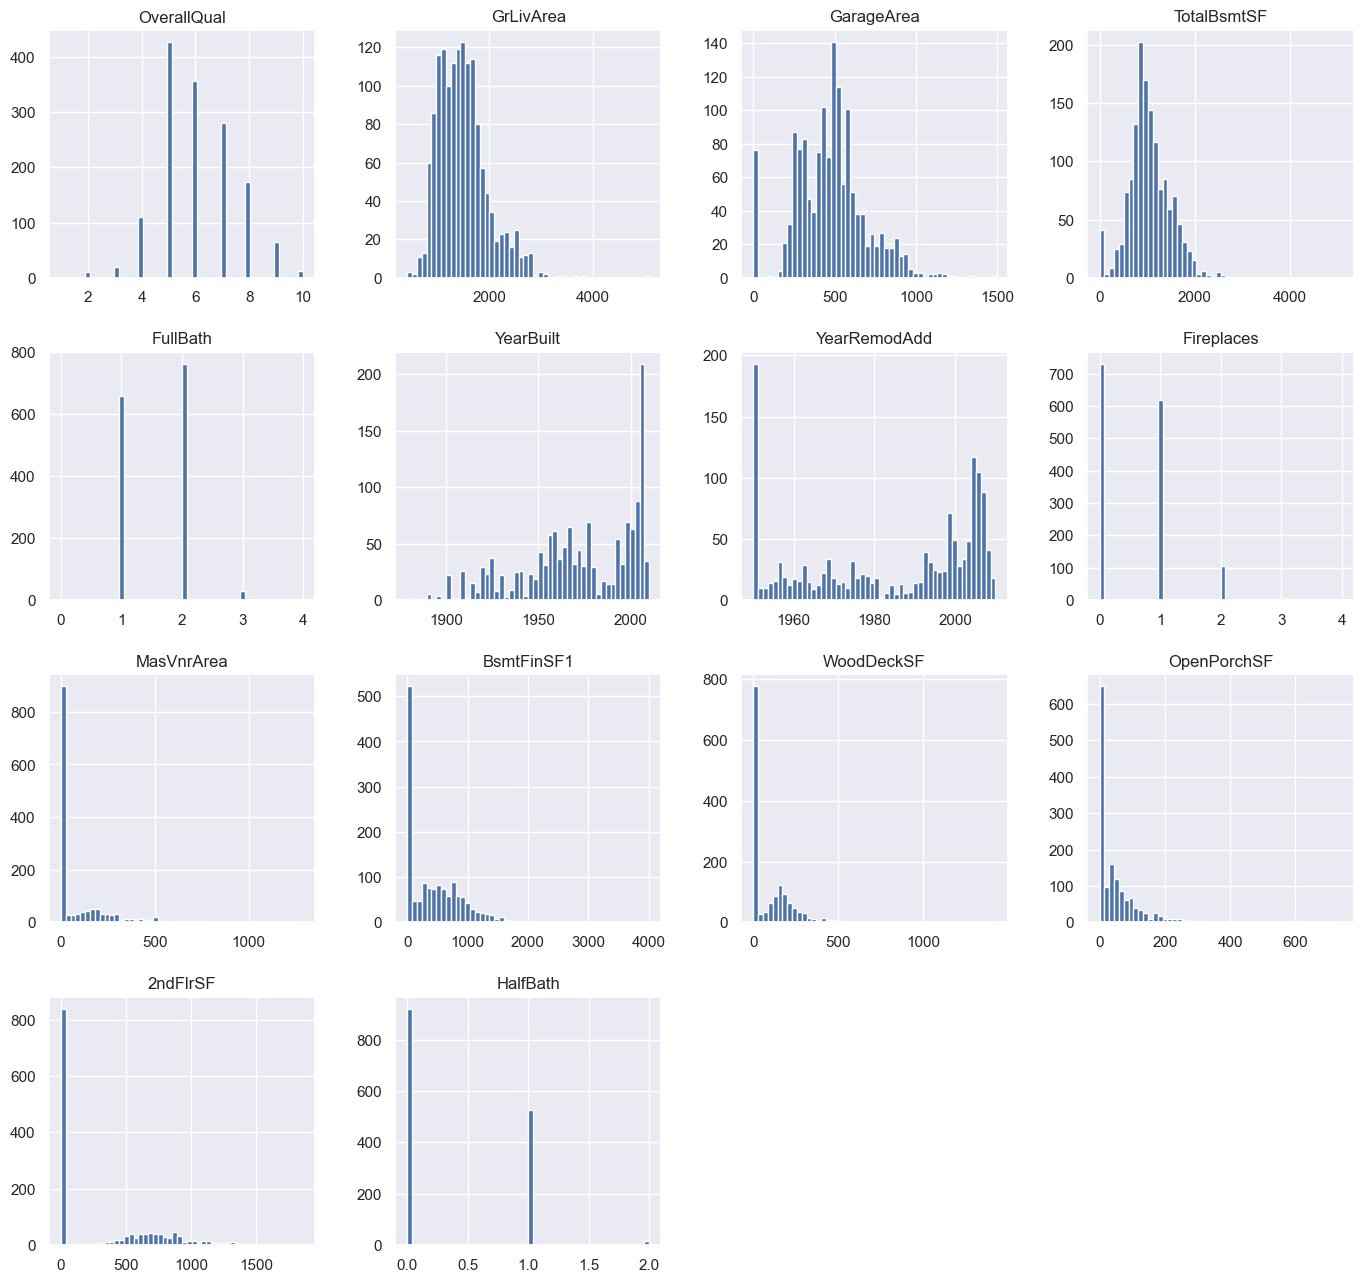

In [ ]:
test_numeric_update.hist(bins = 50, figsize = (15,15))
plt.show()

###  3.5.2 Missing values in numeric test data

Columns with missing values: ['GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1']
Percentage missing values: GarageArea    0.07
TotalBsmtSF   0.07
MasVnrArea    1.03
BsmtFinSF1    0.07
Name: Missing Values, dtype: float64


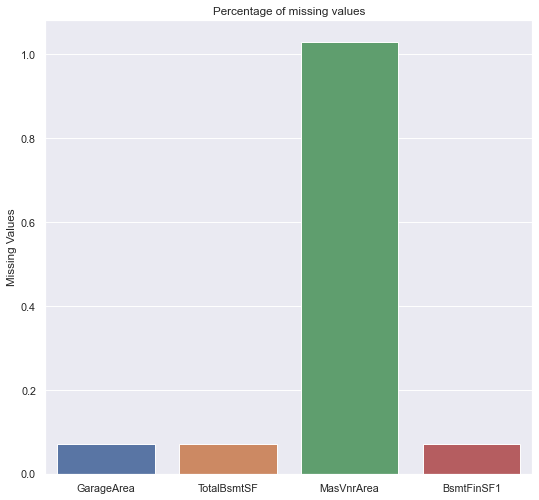

In [ ]:
missing_test = [col for col in test_numeric_update.columns if test_numeric_update[col].isnull().any()]
total_missing_test = pd.DataFrame(test_numeric_update[missing_test].isnull().sum(), columns = ['Missing Values'])
percentage_missing_test = ((total_missing_test['Missing Values'] * 100) / test_numeric_update.shape[0]).round(2)

print(f"Columns with missing values: {missing_test}")
print(f"Percentage missing values: {percentage_missing_test}")

plt.figure(figsize = (8,8), dpi = 70)
sns.set_style('darkgrid')
sns.barplot(x = total_missing_test.index, y = percentage_missing_test, data = total_missing_test)
plt.title('Percentage of missing values')
plt.show()

### 3.5.3 KNN Imputation of numeric test data

In [ ]:
imputer = KNNImputer(n_neighbors = 2)

imputed_test_numeric_update = pd.DataFrame(imputer.fit_transform(test_numeric_update))
imputed_test_numeric_update.columns = test_numeric_update.columns

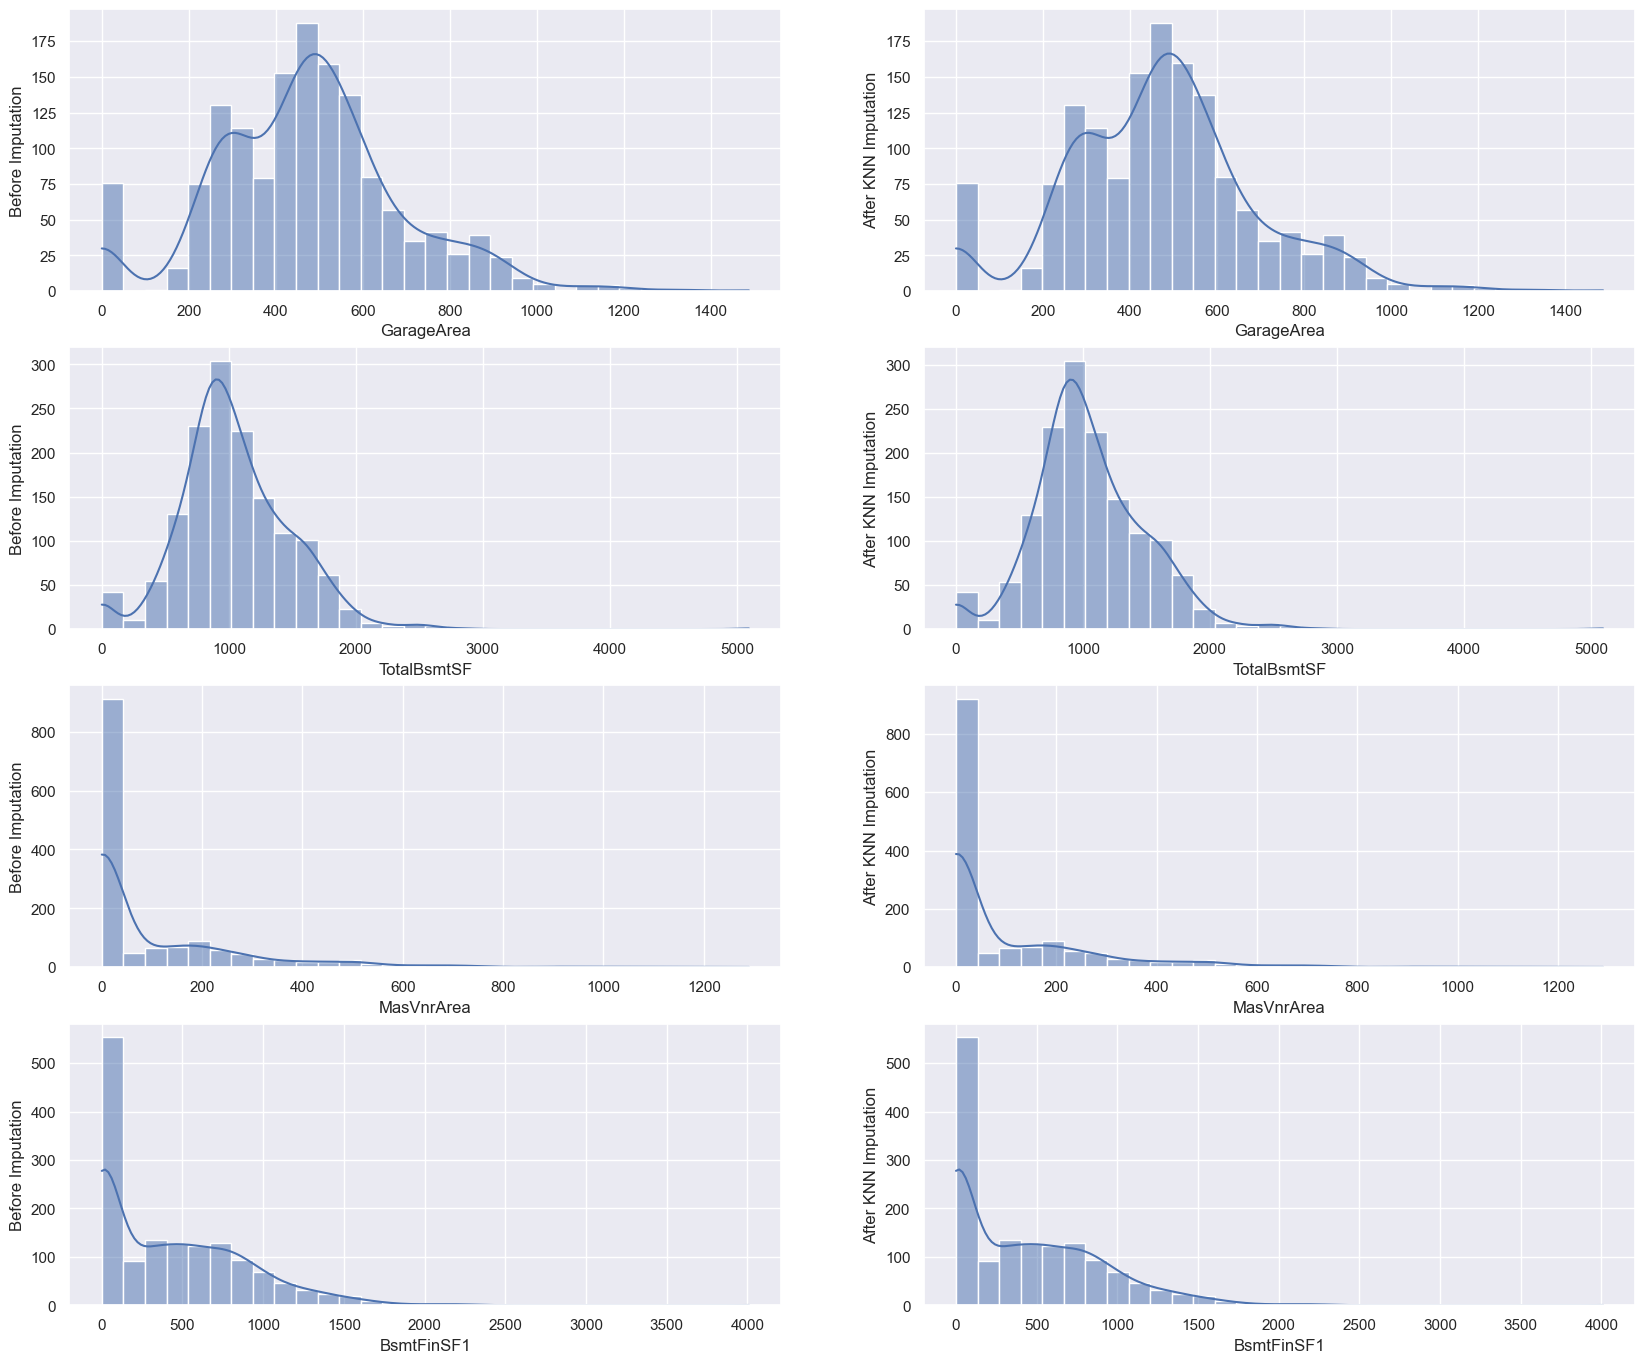

In [ ]:
sns.set(rc = {'figure.figsize':(18,16)})
fig, ax = plt.subplots(4, 2)

for pos, feature in enumerate(missing_test):
    sns.histplot(test_numeric_update[feature], bins = 30, kde = True, ax = ax[pos, 0])
    ax[pos, 0].set_ylabel('Before Imputation')

    sns.histplot(imputed_test_numeric_update[feature], bins = 30, kde = True, ax = ax[pos, 1])
    ax[pos, 1].set_ylabel('After KNN Imputation')

plt.show()

#### After the KNN Imputation, there's no significant change in the distributed data. So, we will keep all the features on the numeric test data.

### 3.6 Check for Missing values in both numeric data sets

In [ ]:
pd.DataFrame([imputed_train_numeric_update.isnull().sum(), imputed_test_numeric_update.isnull().sum()], index = ['Train', 'Test'])

OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
Train         0.00       0.00        0.00         0.00      0.00       0.00   
Test          0.00       0.00        0.00         0.00      0.00       0.00   

       YearRemodAdd  Fireplaces  MasVnrArea  BsmtFinSF1  WoodDeckSF  \
Train          0.00        0.00        0.00        0.00        0.00   
Test           0.00        0.00        0.00        0.00        0.00   

       OpenPorchSF  2ndFlrSF  HalfBath  SalePrice  
Train         0.00      0.00      0.00       0.00  
Test          0.00      0.00      0.00        NaN

In [ ]:
imputed_train_numeric_update.shape, imputed_test_numeric_update.shape

((1460, 15), (1459, 14))

# 4. Categorical Data Analyze

In [ ]:
train_categoric = [col for col in train.columns if train[col].dtypes == 'object']
print(f"Categorical Features:\n{train_categoric}")
print(f"\nTotal Categirical Features: {len(train_categoric)}")

Categorical Features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Total Categirical Features: 43


## 4.1 Distribution of Categorical Data

In [ ]:
train_categorical = pd.concat([train[train_categoric], train['SalePrice']], axis = 1)
test_categorical = test[train_categoric]

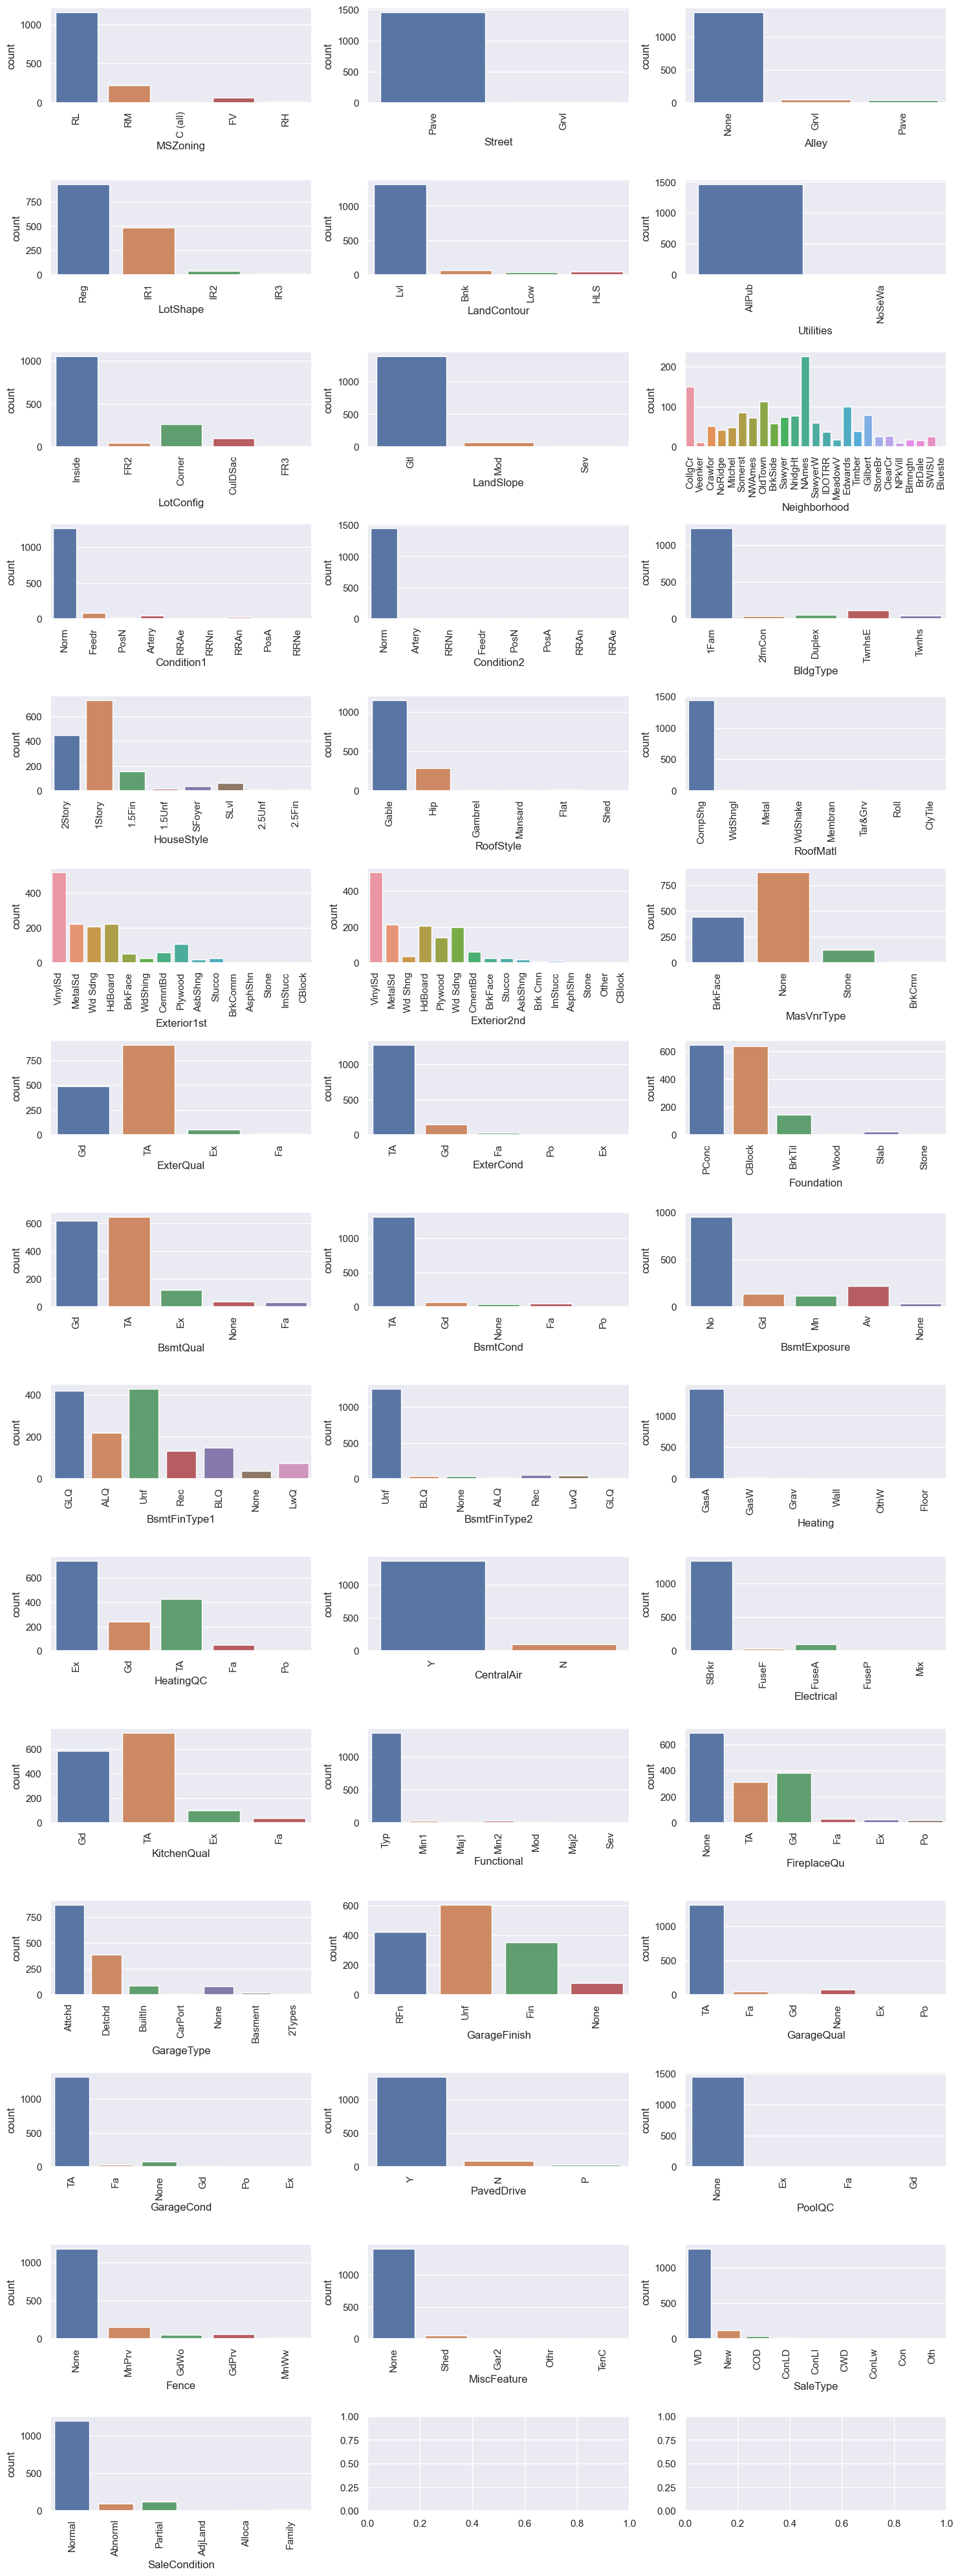

In [ ]:
fig, ax = plt.subplots(15, 3, figsize = (15, 40))

for i, ax in enumerate(fig.axes):
    if i < len(train_categoric):
        sns.countplot(x = train_categoric[i], data = train[train_categoric], ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90)
        ax.set_xlabel(train_categoric[i])

fig.tight_layout()
plt.show()

#### Dropping all the variables that are dominated by a single group, as those will not leave impact on the prediction house price

In [ ]:
categorical_drop = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir',
 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']


train_categorical.drop(categorical_drop, axis = 1, inplace = True)
test_categorical.drop(categorical_drop, axis = 1, inplace = True)

print(f"Categorical Train:{train_categorical}")
print(f"Categorical Test:{test_categorical}")

Categorical Train:     MSZoning Alley LotShape LotConfig Neighborhood Condition1 BldgType  \
0          RL  None      Reg    Inside      CollgCr       Norm     1Fam   
1          RL  None      Reg       FR2      Veenker      Feedr     1Fam   
2          RL  None      IR1    Inside      CollgCr       Norm     1Fam   
3          RL  None      IR1    Corner      Crawfor       Norm     1Fam   
4          RL  None      IR1       FR2      NoRidge       Norm     1Fam   
...       ...   ...      ...       ...          ...        ...      ...   
1455       RL  None      Reg    Inside      Gilbert       Norm     1Fam   
1456       RL  None      Reg    Inside       NWAmes       Norm     1Fam   
1457       RL  None      Reg    Inside      Crawfor       Norm     1Fam   
1458       RL  None      Reg    Inside        NAmes       Norm     1Fam   
1459       RL  None      Reg    Inside      Edwards       Norm     1Fam   

     HouseStyle RoofStyle Exterior1st  ... KitchenQual FireplaceQu GarageType  \


In [ ]:
print(f"Categorical Train: {train_categorical.shape}")
print(f"Categorical Test: {test_categorical.shape}")

Categorical Train: (1460, 29)
Categorical Test: (1459, 28)


### 4.1.1 Visualize in boxplot

#### To get the idea of how the features vary with the target variable

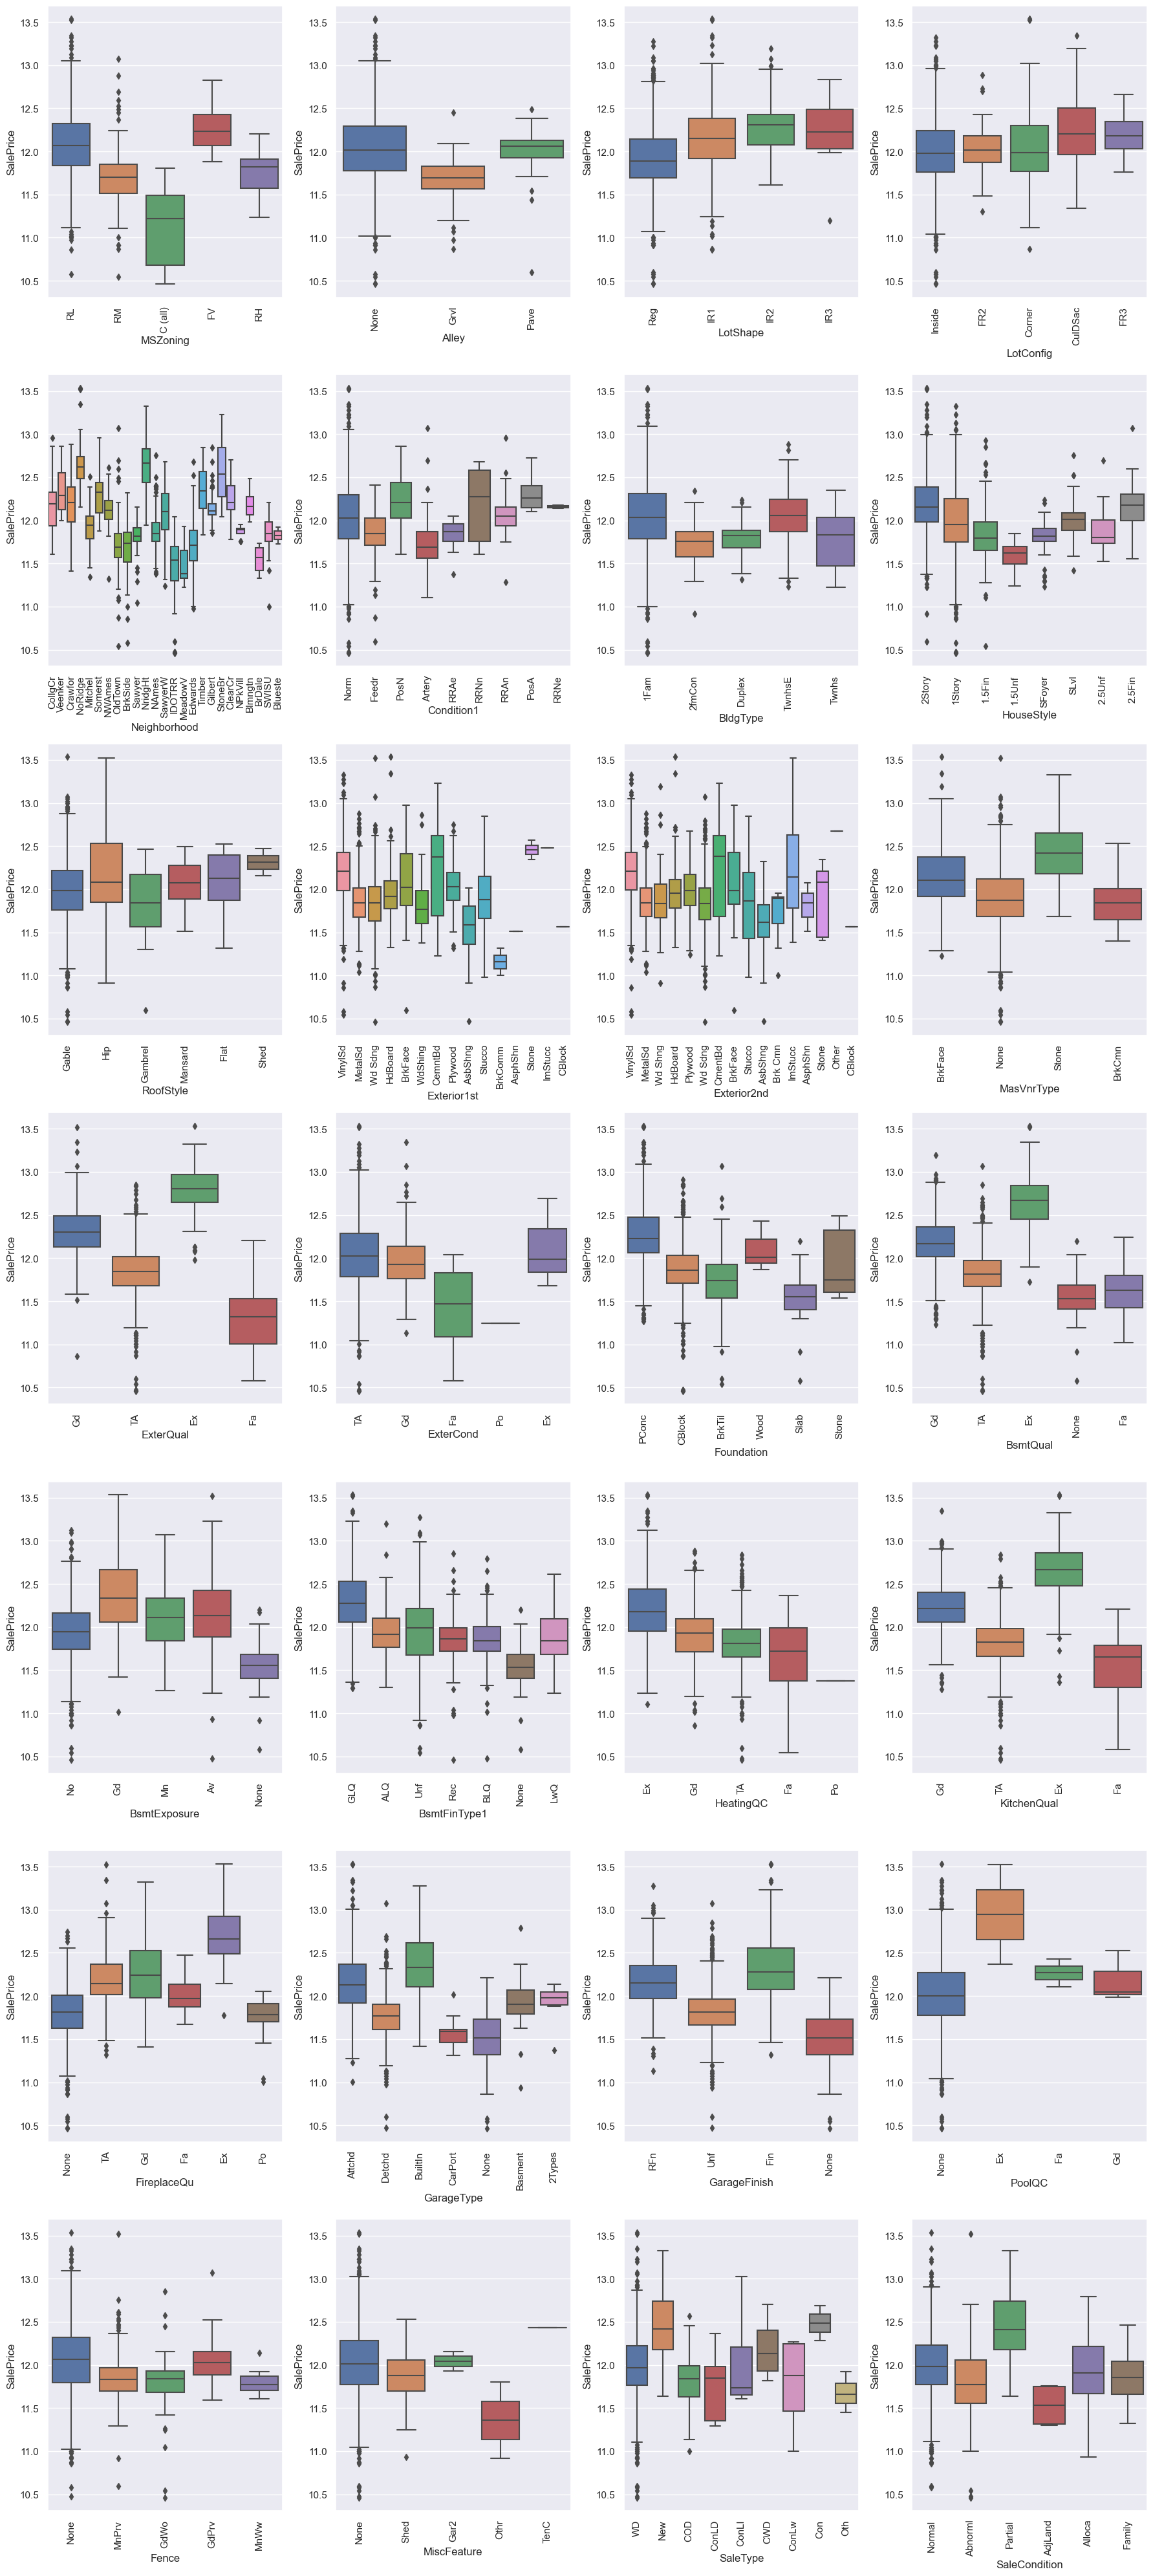

In [ ]:
fig, ax = plt.subplots(7, 4, figsize = (18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(train_categorical.columns) - 1:
        sns.boxplot(x = train_categorical.columns[i], y = 'SalePrice', data = train_categorical, ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90)

fig.tight_layout()
plt.show()

## 4.2 Missing values in Categorical data

In [ ]:
categorical_missing_train = [col for col in train_categorical.columns if train_categorical[col].isnull().any()]

print(f"Columns with missing values: {categorical_missing_train}")

Columns with missing values: []


In [ ]:
categorical_missing_test = [col for col in test_categorical.columns if test_categorical[col].isnull().any()]

print(f"Columns with missing values: {categorical_missing_test}")

Columns with missing values: ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']


In [ ]:
test_categorical['Exterior1st'] = test_categorical['Exterior1st'].fillna(test_categorical['Exterior1st'].mode()[0])
test_categorical['Exterior2nd'] = test_categorical['Exterior2nd'].fillna(test_categorical['Exterior2nd'].mode()[0])
test_categorical['KitchenQual'] = test_categorical['KitchenQual'].fillna(test_categorical['KitchenQual'].mode()[0])
test_categorical['SaleType'] = test_categorical['SaleType'].fillna(test_categorical['SaleType'].mode()[0])

In [ ]:
categorical_missing_test = [col for col in test_categorical.columns if test_categorical[col].isnull().any()]

print(f"Columns with missing values: {categorical_missing_test}")

Columns with missing values: []


In [ ]:
train_categorical.shape, test_categorical.shape

((1460, 29), (1459, 28))

## 4.3 Encoding Categorical Variables

In [ ]:
train_categorical.drop(['SalePrice'], axis = 1, inplace = True)

train_categorical_dummies = pd.get_dummies(train_categorical, drop_first = True)
train_categorical_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_None  Alley_Pave  \
0            0            0            1            0           1           0   
1            0            0            1            0           1           0   
2            0            0            1            0           1           0   
3            0            0            1            0           1           0   
4            0            0            1            0           1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  ...  \
0             0             0             1                  0  ...   
1             0             0             1                  0  ...   
2             0             0             0                  0  ...   
3             0             0             0                  0  ...   
4             0             0             0                  0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 164 columns]

In [ ]:
test_categorical_dummies = pd.get_dummies(test_categorical, drop_first = True)
test_categorical_dummies.head()

MSZoning_FV  MSZoning_None  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0            0              0            1            0            0   
1            0              0            0            1            0   
2            0              0            0            1            0   
3            0              0            0            1            0   
4            0              0            0            1            0   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  ...  \
0           1           0             0             0             1  ...   
1           1           0             0             0             0  ...   
2           1           0             0             0             0  ...   
3           1           0             0             0             0  ...   
4           1           0             0             0             0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 159 columns]

In [ ]:
variables_extra_train = [i for i in train_categorical_dummies.columns if i not in test_categorical_dummies.columns]
variables_extra_test = [i for i in test_categorical_dummies.columns if i not in train_categorical_dummies.columns]
print(f'Columns not in train set but present in test set: {variables_extra_train}')
print(f'Columns not in test set but present in train set: {variables_extra_test}')

Columns not in train set but present in test set: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'PoolQC_Fa', 'MiscFeature_TenC']
Columns not in test set but present in train set: ['MSZoning_None']


In [ ]:
train_categorical_dummies.drop(['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Exterior1st_Stone', 'Exterior2nd_Other', 'PoolQC_Fa', 'MiscFeature_TenC'], axis = 1, inplace = True)
test_categorical_dummies.drop(['MSZoning_None'], axis = 1, inplace = True)

variables_extra_train = [i for i in train_categorical_dummies.columns if i not in test_categorical_dummies.columns]
variables_extra_test = [i for i in test_categorical_dummies.columns if i not in train_categorical_dummies.columns]
print(f'Columns not in train set but present in test set: {variables_extra_train}')
print(f'Columns not in test set but present in train set: {variables_extra_test}')

Columns not in train set but present in test set: []
Columns not in test set but present in train set: []


In [ ]:
print(f"Categorical Train: {train_categorical_dummies.shape}")
print(f"Categorical Test: {test_categorical_dummies.shape}")

Categorical Train: (1460, 158)
Categorical Test: (1459, 158)


# 5. Feature Transformation with Merge Data

In [ ]:
new_train = pd.concat([imputed_train_numeric_update, train_categorical_dummies], axis = 1)
new_test = pd.concat([imputed_test_numeric_update, test_categorical_dummies], axis = 1)


print(f'Shape of new train set: {new_train.shape}\n')
print(f'Shape of new test set: {new_test.shape}\n')

Shape of new train set: (1460, 173)

Shape of new test set: (1459, 172)



Keeping the building age and remodel

In [ ]:
new_train['Built Age'] = new_train['YearBuilt'].max() - new_train['YearBuilt']
new_test['Built Age'] = new_test['YearBuilt'].max() - new_test['YearBuilt']

new_train['Remodel Age'] = new_train['YearRemodAdd'].max() - new_train['YearRemodAdd']
new_test['Remodel Age'] = new_test['YearRemodAdd'].max() - new_test['YearRemodAdd']

In [ ]:
new_train.drop(columns = ["YearBuilt"], axis = 1, inplace = True)
new_test.drop(columns = ['YearBuilt'], axis = 1, inplace = True)

new_train.drop(columns = ["YearRemodAdd"], axis = 1, inplace = True)
new_test.drop(columns = ['YearRemodAdd'], axis = 1, inplace = True)

In [ ]:
print(f'Shape of new train set: {new_train.shape}\n')
print(f'Shape of new test set: {new_test.shape}\n')

Shape of new train set: (1460, 173)

Shape of new test set: (1459, 172)



In [ ]:
dup_check = new_train.loc[:, ~new_train.columns.duplicated()]
print(dup_check.shape)
# No duplicate features

(1460, 173)


In [ ]:
# features = new_train
model = TSNE(n_components = 2, random_state = 42, perplexity = 50)
X = new_train.values #train[new_train].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)

pca = PCA(n_components = 30)
# pca.fit(s)
pc = pca.fit_transform(s)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pc)

KMeans(n_clusters=5)

0.5009235460224134


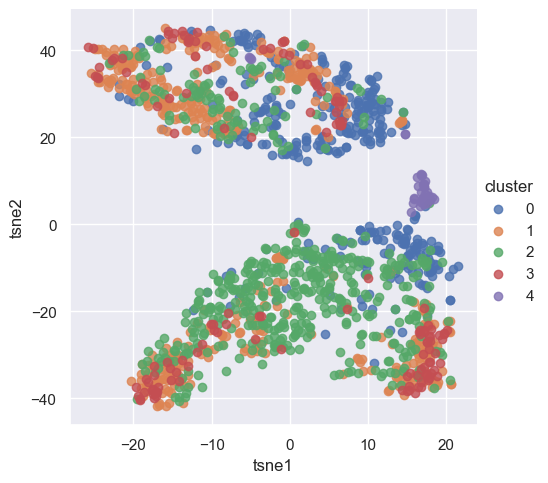

In [ ]:
fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

### 5.1 Split Data

In [ ]:
X = new_train.drop(['SalePrice'], axis = 1)

y = new_train.loc[:, 'SalePrice'] #accessing 'SalePrice'

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}\n')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1022, 172)
y_train: (1022,)

X_test: (438, 172)
y_test: (438,)


# 6. Modeling

### 6.1 Linear Regression

In [ ]:
model_LR = LinearRegression()
scores_LR = cross_val_score(model_LR, X_train, y_train, cv = 5)

print("Mean scores (Linear Model):\n", np.mean(scores_LR))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_LR))

Mean scores (Linear Model):
 0.7416142204951218
Standard deviation of scores (Linear Model):
 0.14862653600942013


In [ ]:
scores_LR_mse = cross_val_score(model_LR, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1

print(f"MSE scores (Linear Model): {scores_LR_mse}")
print("Mean MSE scores:", scores_LR_mse.mean())

MSE scores (Linear Model): [0.0217503  0.07581655 0.02545833 0.02104823 0.04909527]
Mean MSE scores: 0.03863373521615471


In [ ]:
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)


print(f"R² Score: {r2_score(y_test, y_pred_LR)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_LR, squared = False)}")

R² Score: 0.8620974818877842
RMSE: 0.15295204067636076


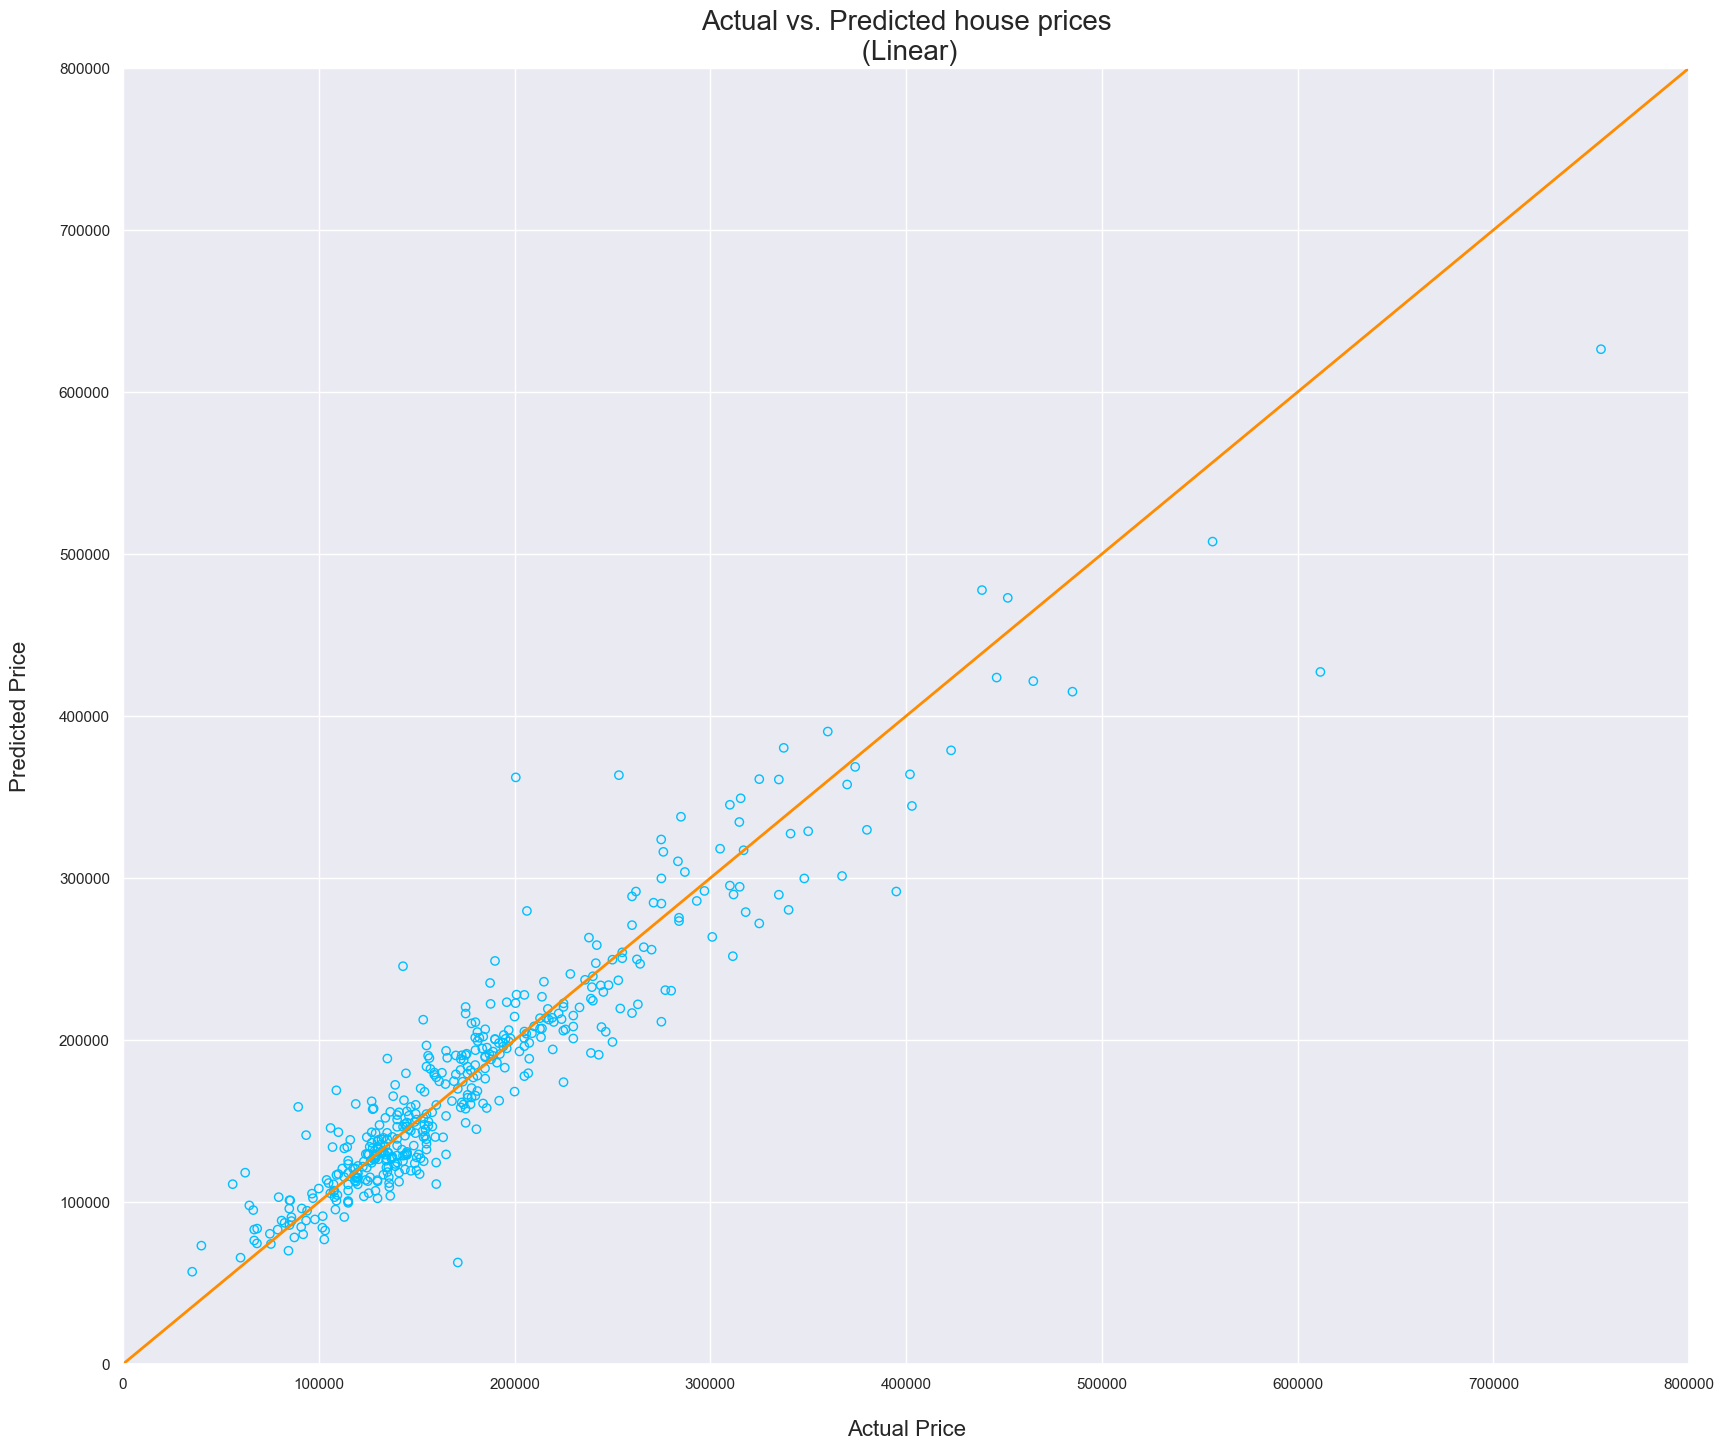

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_LR),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.2 Ridge Regression

In [ ]:
model_Ridge = Ridge(alpha = 0.001)

scores_ridge = cross_val_score(model_Ridge, X_train, y_train, cv = 5)
scores_ridge_mse = cross_val_score(model_Ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (Ridge Model): {np.mean(scores_ridge)}")
print(f"Standard deviation of scores (Ridge Model): {np.std(scores_ridge)}\n")

print(f"MSE scores (Ridge Model): {scores_ridge_mse}")
print(f"Mean MSE scores: {scores_ridge_mse.mean()}")

Mean scores (Ridge Model): 0.7418729958617586
Standard deviation of scores (Ridge Model): 0.1484058353108503

MSE scores (Ridge Model): [0.02174335 0.07578322 0.0254566  0.02104418 0.04896741]
Mean MSE scores: 0.03859895379912726


In [ ]:
model_Ridge.fit(X_train, y_train)
y_pred_ridge = model_Ridge.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_ridge)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_ridge))))

R² Score: 0.8621533987389689
RMSE:  0.15292102795894036


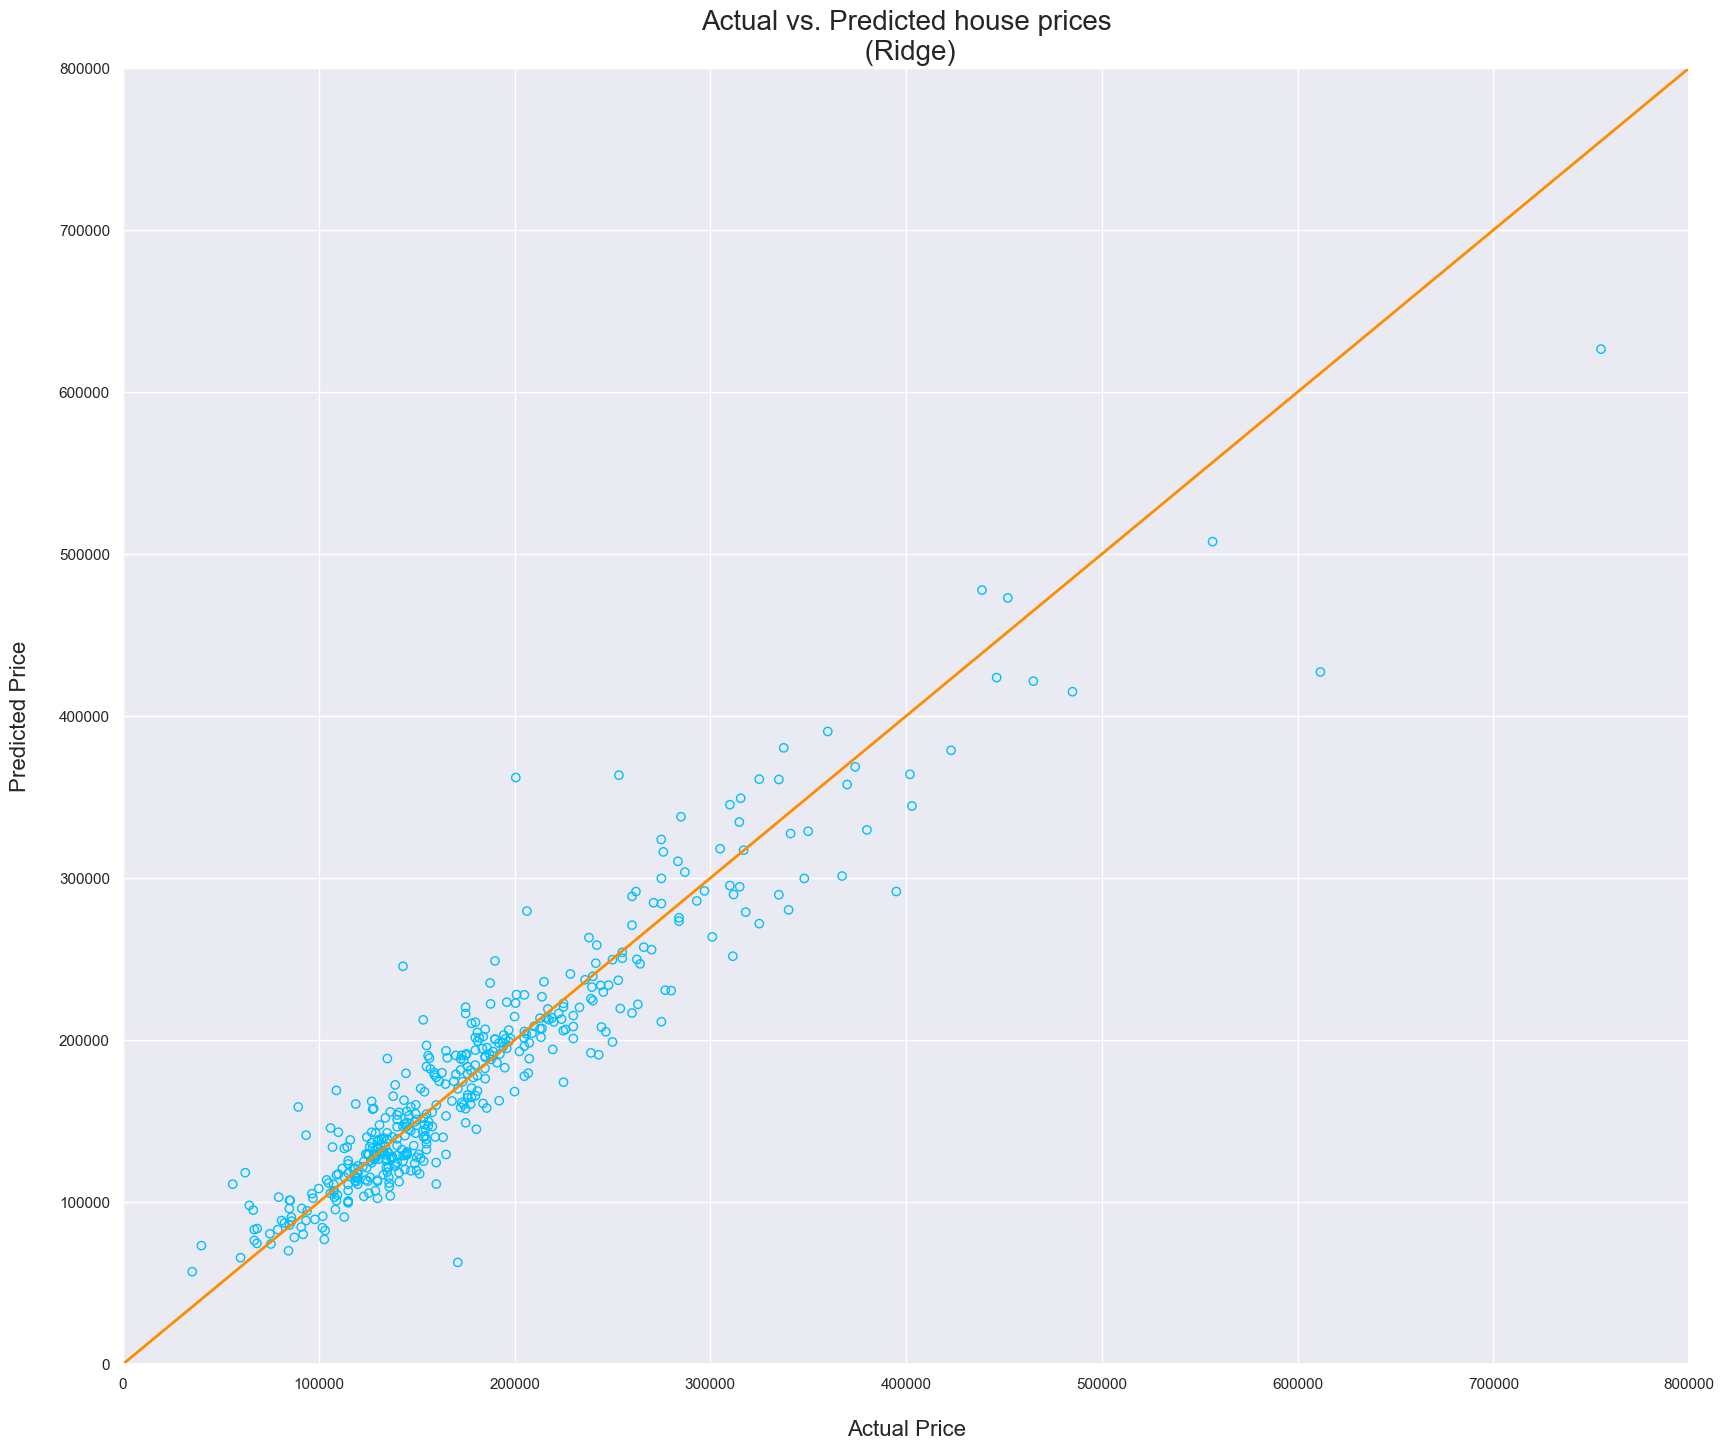

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.2.1 Hyperparameter Tuning Ridge

In [ ]:
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv = 10, n_jobs = -1, verbose = 1)

ridge_cv.fit(X_train, y_train)


print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 10.0}
Best R² (train): 0.8311804716245087


### 6.3 Lasso Regression

In [ ]:
model_Lasso = Lasso(alpha = 0.001)
scores_Lasso = cross_val_score(model_Lasso, X_train, y_train, cv = 5)
scores_Lasso_mse = cross_val_score(model_Lasso, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (Lasso Model): {np.mean(scores_Lasso)}")
print(f"Standard deviation of scores (Lasso Model): {np.std(scores_Lasso)}\n")

print(f"MSE scores (Lasso Model): {scores_Lasso_mse}")
print(f"Mean MSE scores: {scores_Lasso_mse.mean()}")

Mean scores (Lasso Model): 0.7872065961365123
Standard deviation of scores (Lasso Model): 0.1347491761026713

MSE scores (Lasso Model): [0.01890967 0.07330426 0.02429602 0.0177529  0.02799736]
Mean MSE scores: 0.03245204117970602


In [ ]:
model_Lasso.fit(X_train, y_train)
y_pred_lasso = model_Lasso.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_lasso)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_lasso))))

R² Score: 0.8860230042398884
RMSE:  0.13905217304055514


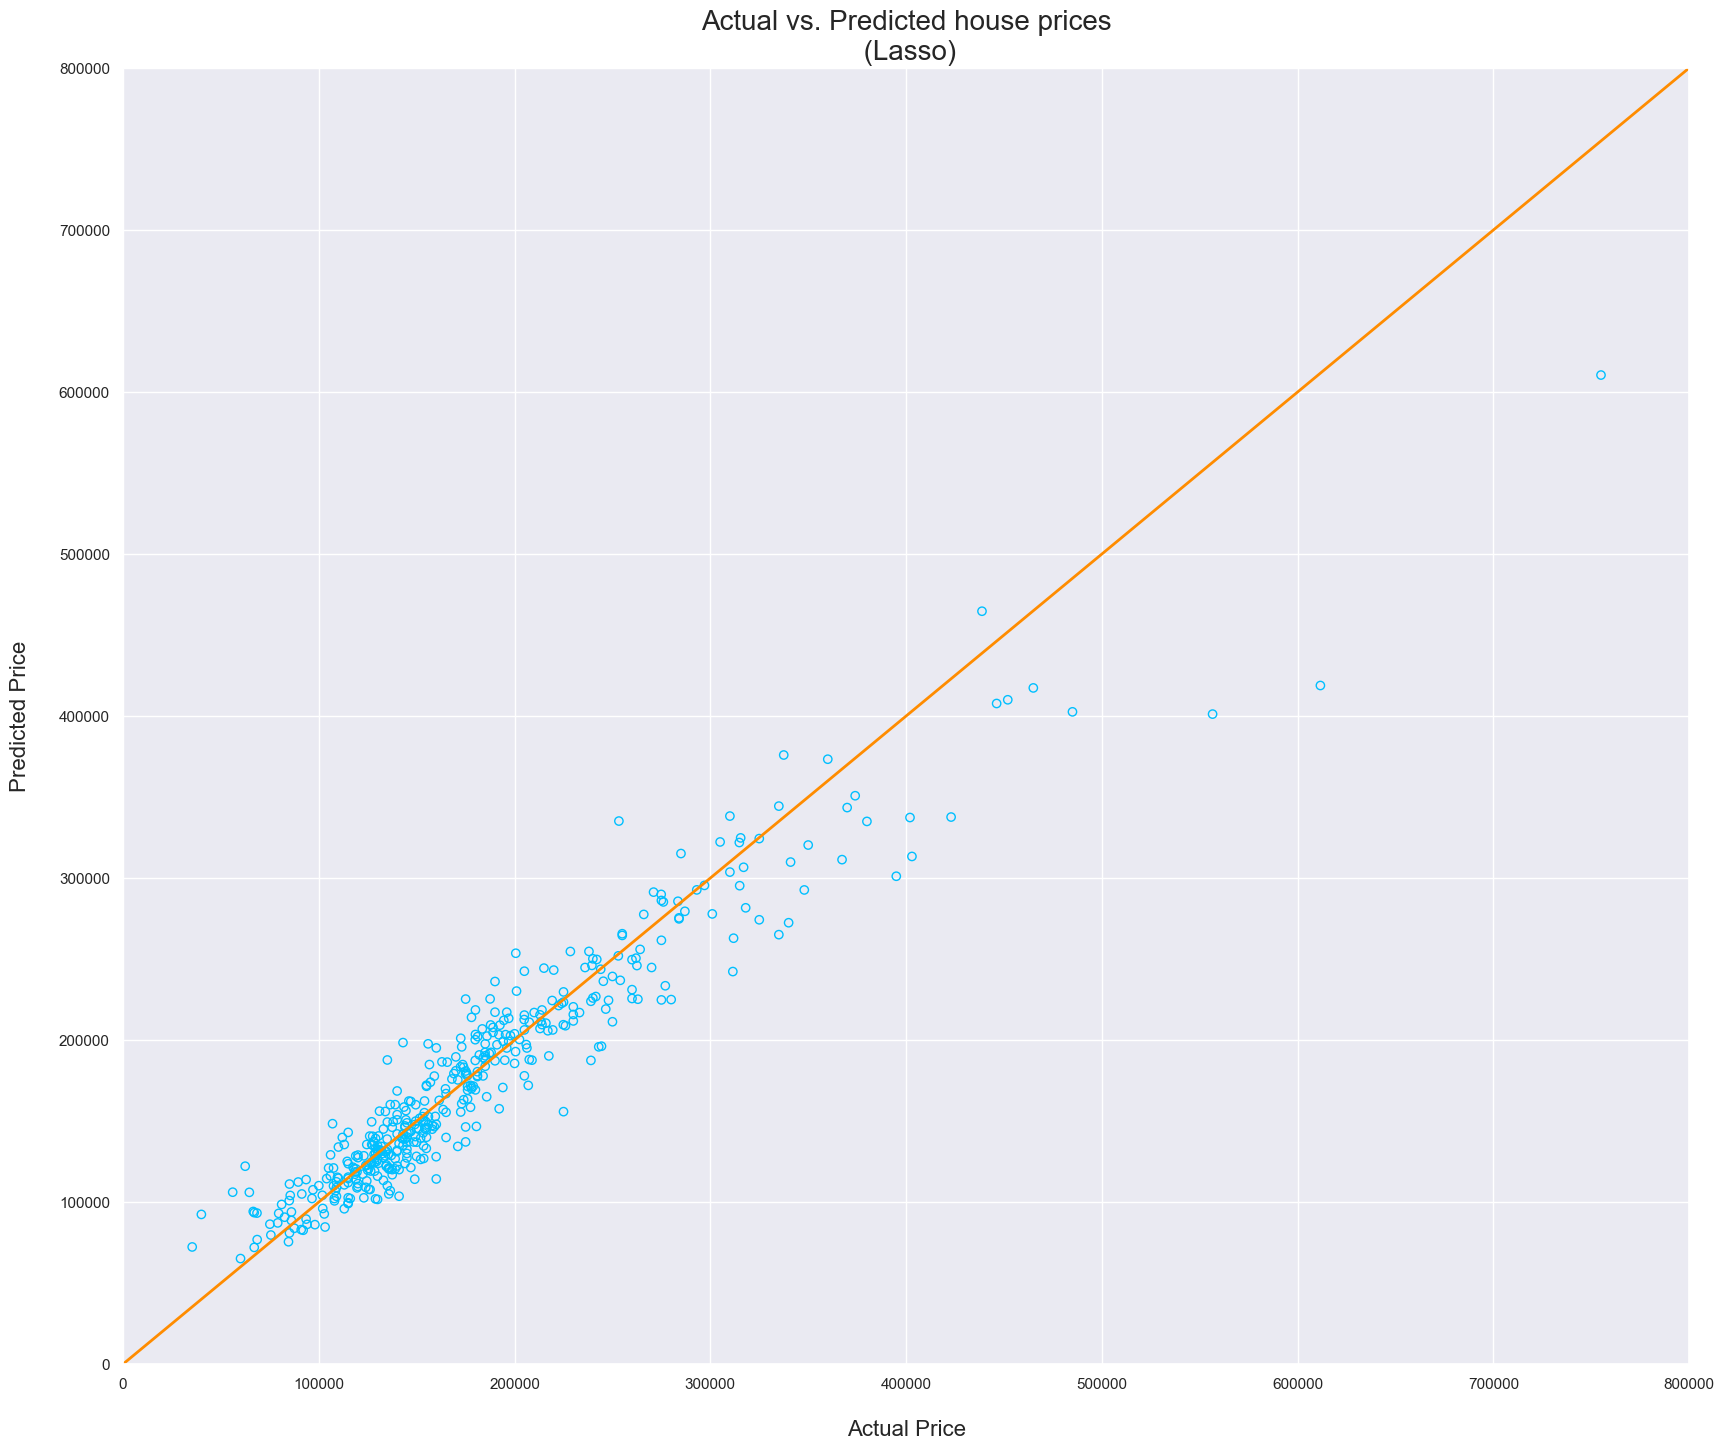

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.3.1 Hyperparameter Tunning Lasso

In [ ]:
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv = 10, n_jobs = -1, verbose = 1)

lasso_cv.fit(X_train, y_train)


print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 0.0}
Best R² (train): 0.7524641457461086


### 6.4 Decision Tree Regressor

In [ ]:
model_Tree = DecisionTreeRegressor()

scores_Tree = cross_val_score(model_Tree, X_train, y_train, cv = 5)
scores_Tree_mse = cross_val_score(model_Tree, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (Decision Tree Model): {np.mean(scores_Tree)}")
print(f"Standard deviation of scores (Decision Tree Model): {np.std(scores_Tree)}\n")

print(f"MSE scores (Decision Tree Model): {scores_Tree_mse}")
print(f"Mean MSE scores: {scores_Tree_mse.mean()}")

Mean scores (Decision Tree Model): 0.6969452739159537
Standard deviation of scores (Decision Tree Model): 0.04708557380944955

MSE scores (Decision Tree Model): [0.05363001 0.06692656 0.04688046 0.04675118 0.03661311]
Mean MSE scores: 0.05016026571658949


In [ ]:
model_Tree.fit(X_train, y_train)
y_pred_Tree = model_Tree.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_Tree)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_Tree))))

R² Score: 0.7536793808652642
RMSE:  0.20441820065594912


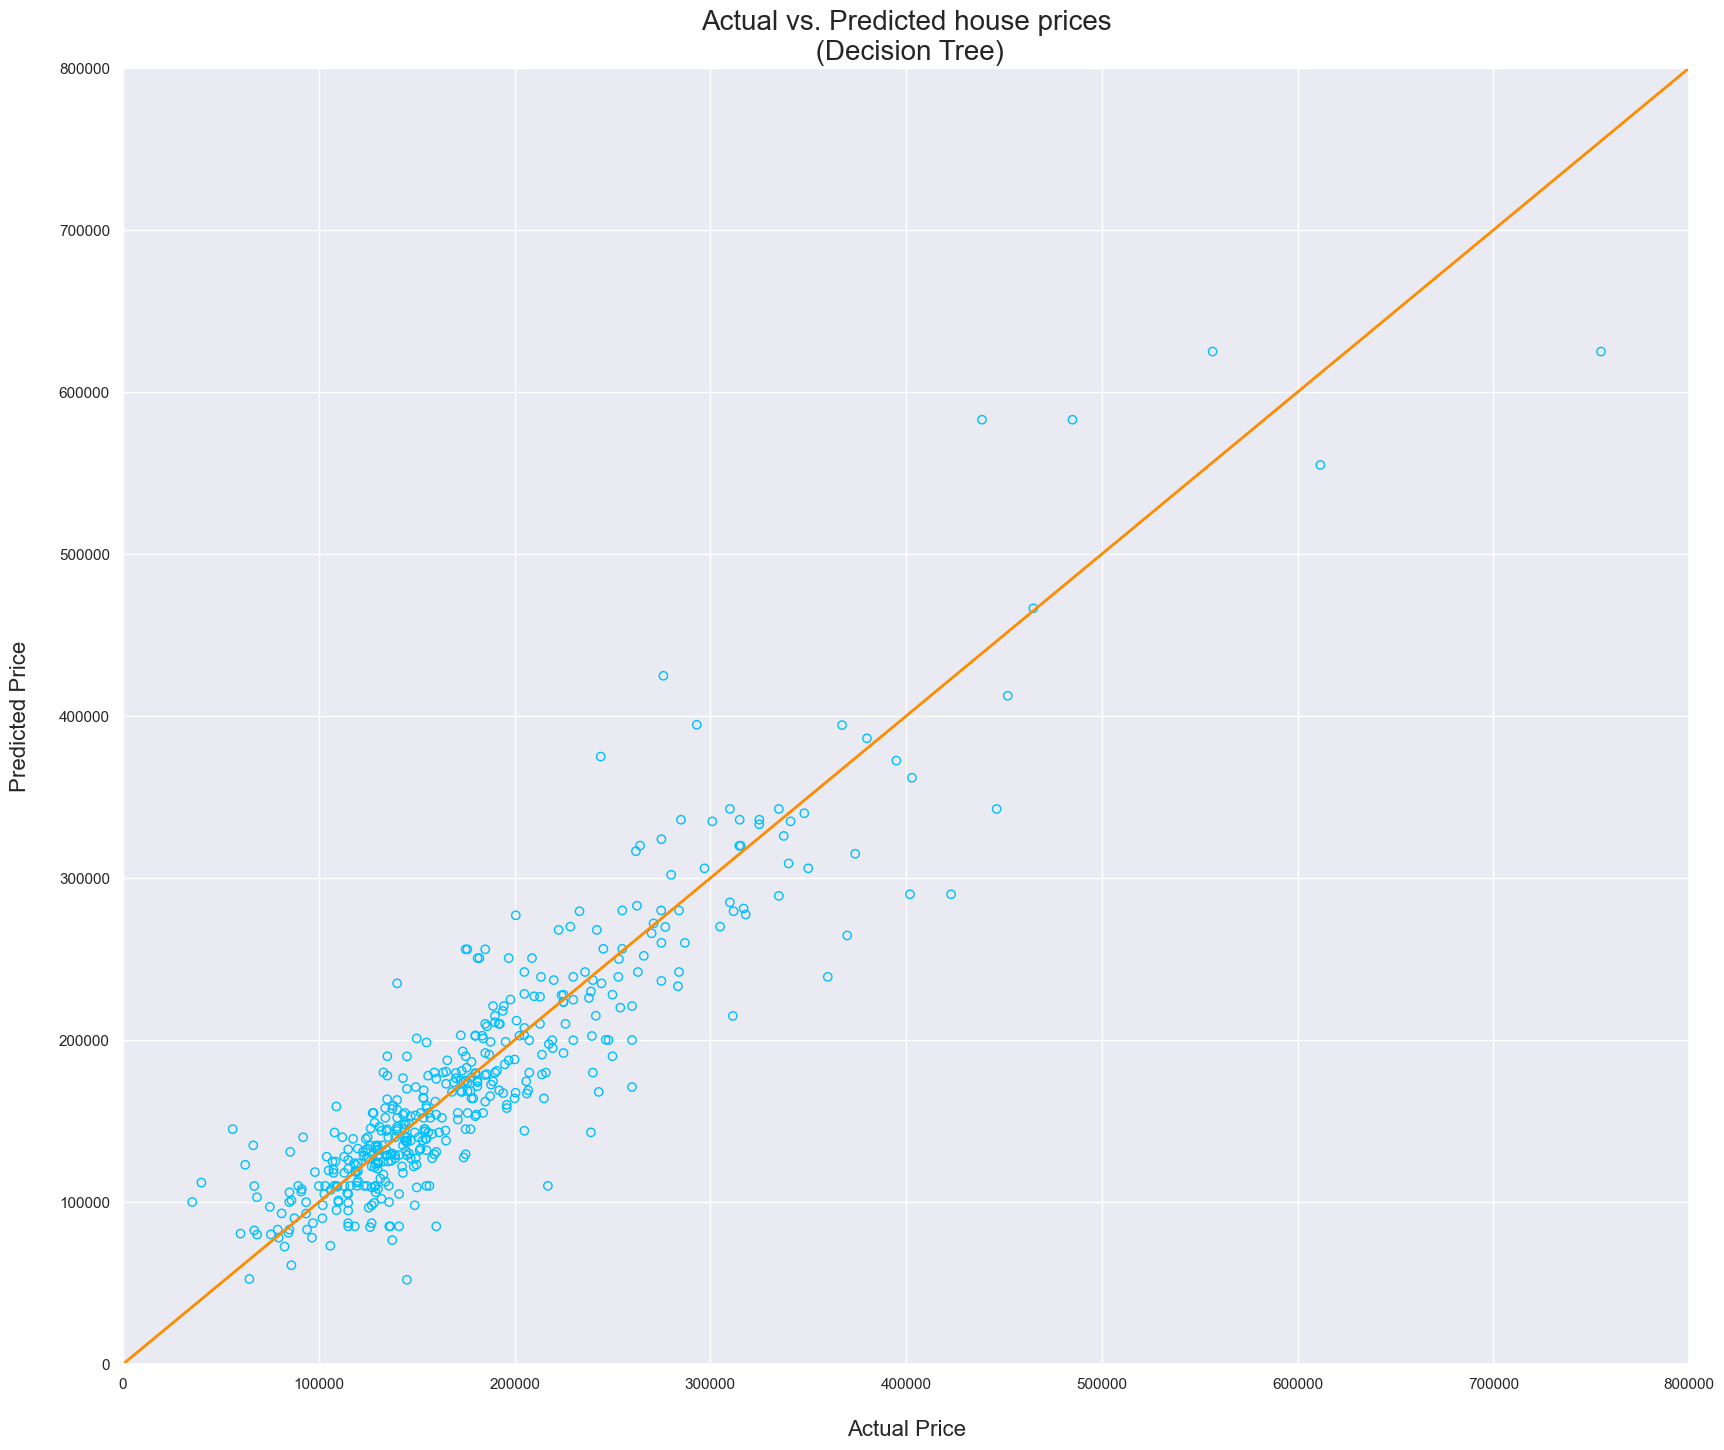

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Decision Tree)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_Tree),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.5 Random Forest Regressor

In [ ]:
model_Random = RandomForestRegressor()

scores_Random = cross_val_score(model_Random, X_train, y_train, cv = 5)
scores_Random_mse = cross_val_score(model_Random, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (Random Forest Model): {np.mean(scores_Random)}")
print(f"Standard deviation of scores (Random Forest Model): {np.std(scores_Random)}\n")

print(f"MSE scores (Random Forest Model): {scores_Random_mse}")
print(f"Mean MSE scores: {scores_Random_mse.mean()}")

Mean scores (Random Forest Model): 0.8378346542985076
Standard deviation of scores (Random Forest Model): 0.0452852611038524

MSE scores (Random Forest Model): [0.02059818 0.03779968 0.02925127 0.02073633 0.01690183]
Mean MSE scores: 0.02505745688886154


In [ ]:
model_Random.fit(X_train, y_train)
y_pred_Random = model_Random.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_Random)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_Random))))

R² Score: 0.8776356153435511
RMSE:  0.14407767537164964


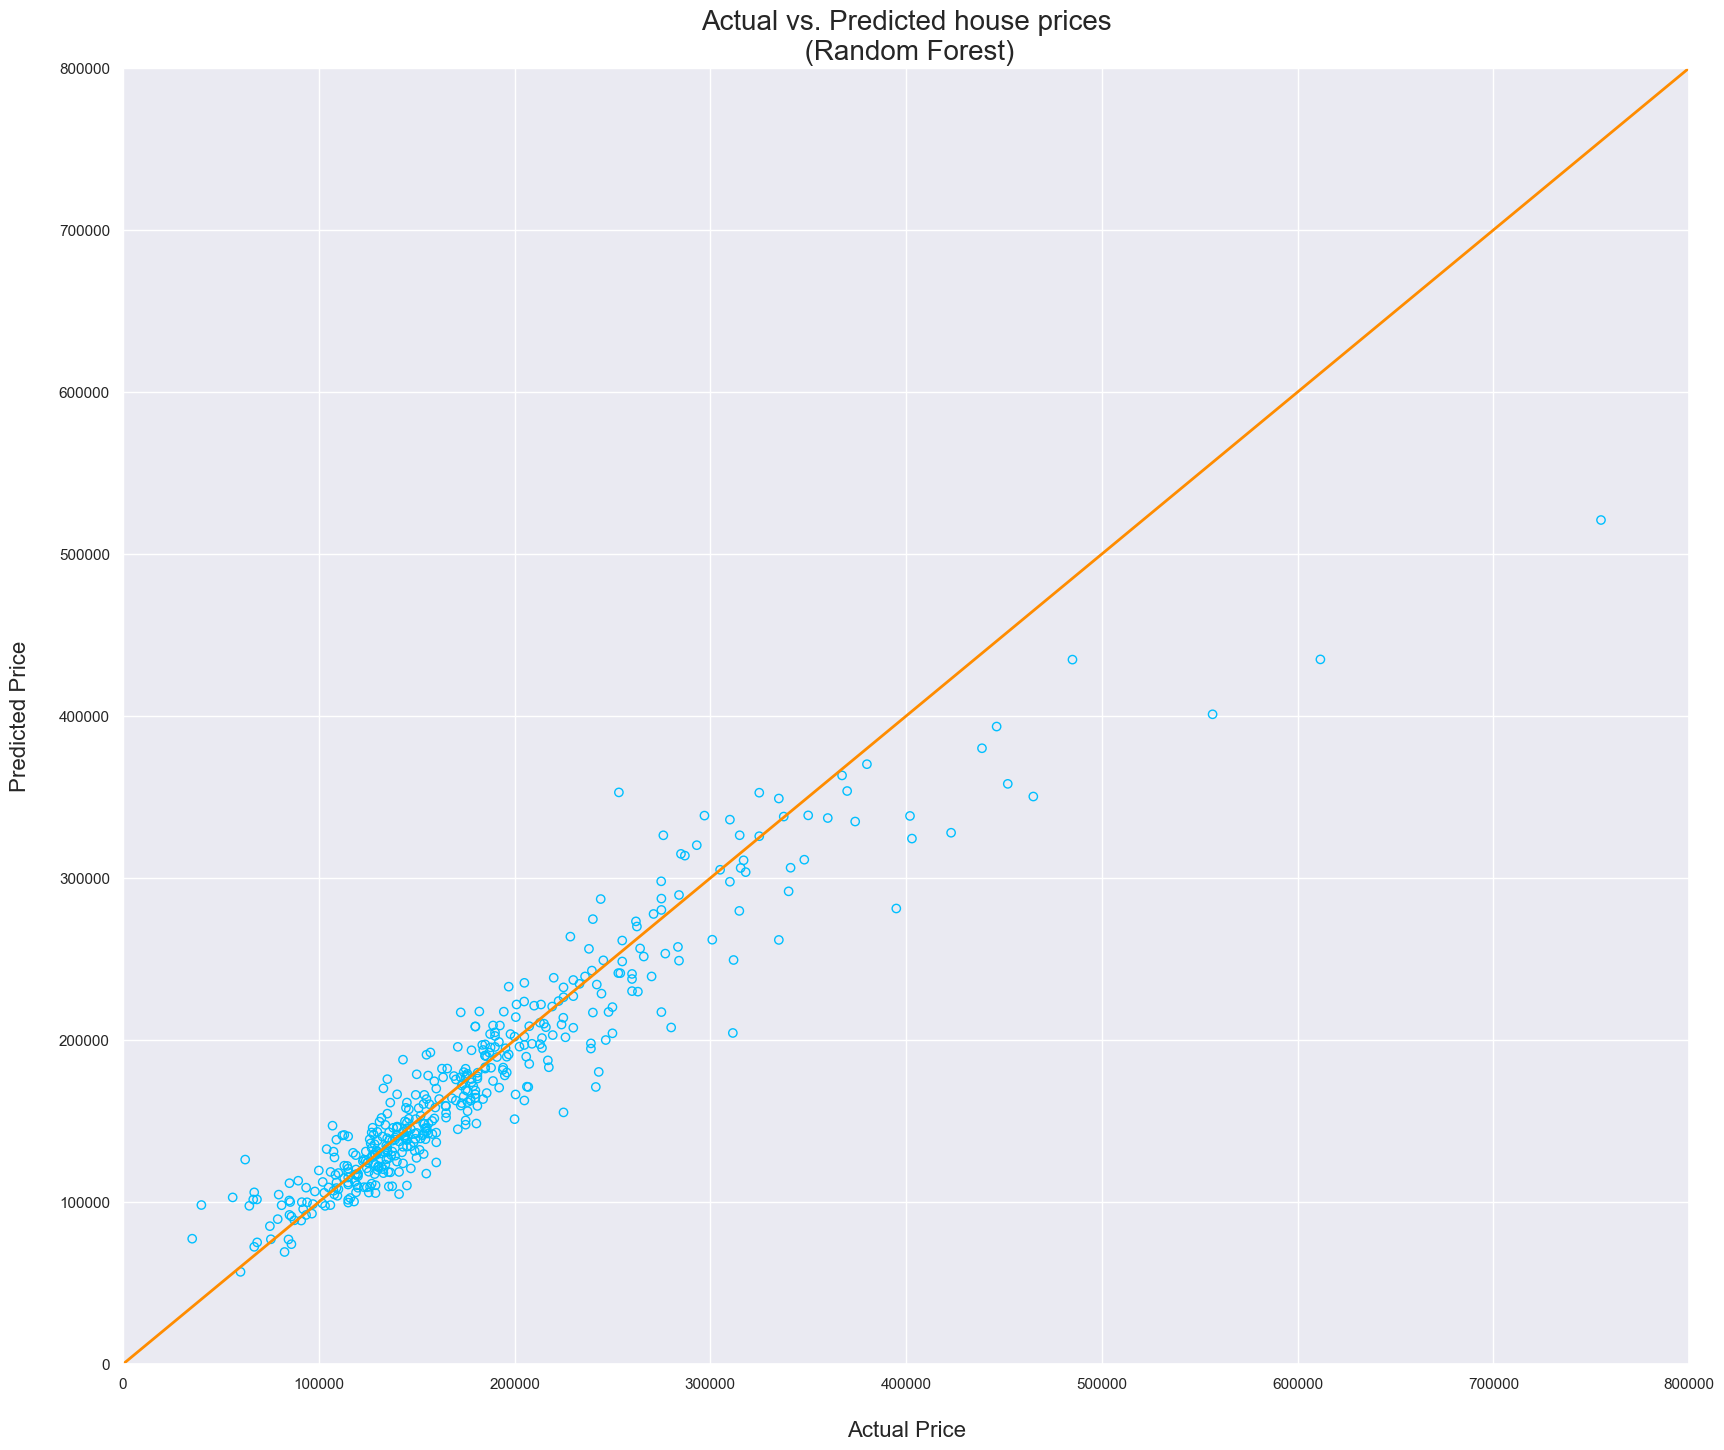

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_Random),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.6 XGBoost Regressor

In [ ]:
model_xgb_regressor = XGBRegressor()

scores_xgb_regressor = cross_val_score(model_xgb_regressor, X_train, y_train, cv = 5)
scores_xgb_regressor_mse = cross_val_score(model_xgb_regressor, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (XGB Model): {np.mean(scores_xgb_regressor)}")
print(f"Standard deviation of scores (XGB Model): {np.std(scores_xgb_regressor)}\n")

print(f"MSE scores (XGB Model): {scores_xgb_regressor_mse}")
print(f"Mean MSE scores: {scores_xgb_regressor_mse.mean()}")

Mean scores (XGB Model): 0.8263013847839413
Standard deviation of scores (XGB Model): 0.03473871722665981

MSE scores (XGB Model): [0.02902195 0.03673959 0.0294843  0.02006153 0.01929794]
Mean MSE scores: 0.02692106137848113


In [ ]:
model_xgb_regressor.fit(X_train, y_train)
y_pred_xgb_regressor = model_xgb_regressor.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_xgb_regressor)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_xgb_regressor))))

R² Score: 0.8734227432491429
RMSE:  0.14653690582443252


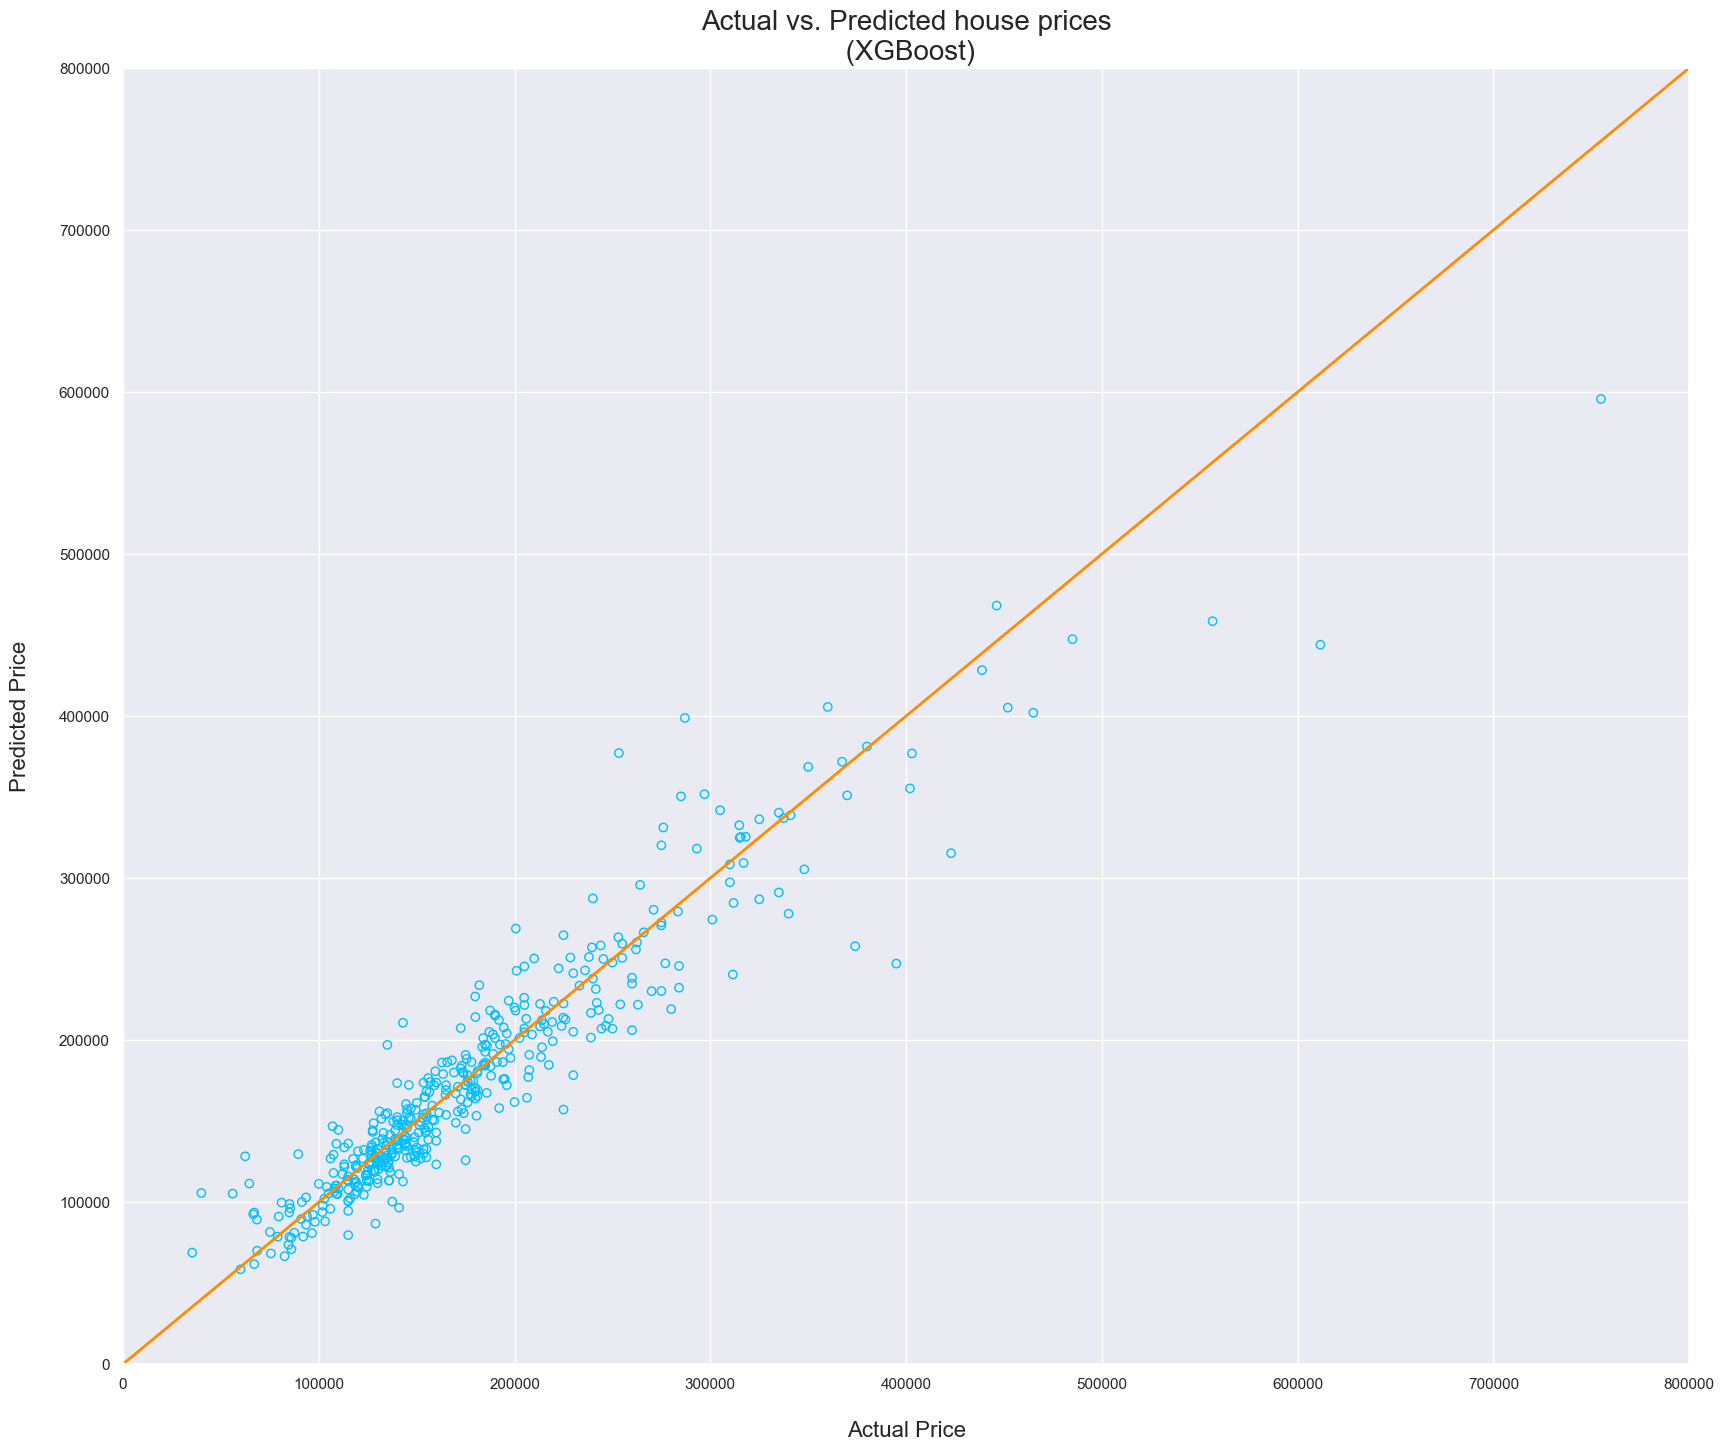

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_regressor),
           color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 6.7  Support Vector Machine Regressor

In [ ]:
# X_train = StandardScaler().fit_transform(X_train)
# y_train = StandardScaler().fit_transform(y_train)

In [ ]:
model_svr_regressor = SVR(kernel='linear', C=1, gamma='auto')
model_svr_regressor.fit(X_train, y_train)
model_svr_regressor.score(X_test, y_test)
#========================================================================================
scores_SVR = cross_val_score(model_svr_regressor, X_train, y_train, cv = 5)
scores_SVR_mse = cross_val_score(model_svr_regressor, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error') * -1


print(f"Mean scores (SVM): {np.mean(scores_SVR)}")
print(f"Standard deviation of scores (SVM): {np.std(scores_SVR)}\n")

print(f"MSE scores (SVM): {scores_SVR_mse}")
print(f"Mean MSE scores: {scores_SVR_mse.mean()}")

In [ ]:
# model_svr_regressor.fit(X_train, y_train)
y_pred_svr = model_svr_regressor.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_svr)}")
print("RMSE: ", (np.sqrt(mean_squared_error(y_test, y_pred_svr))))

R² Score: -311153.13599583996
RMSE:  229.75076521299908


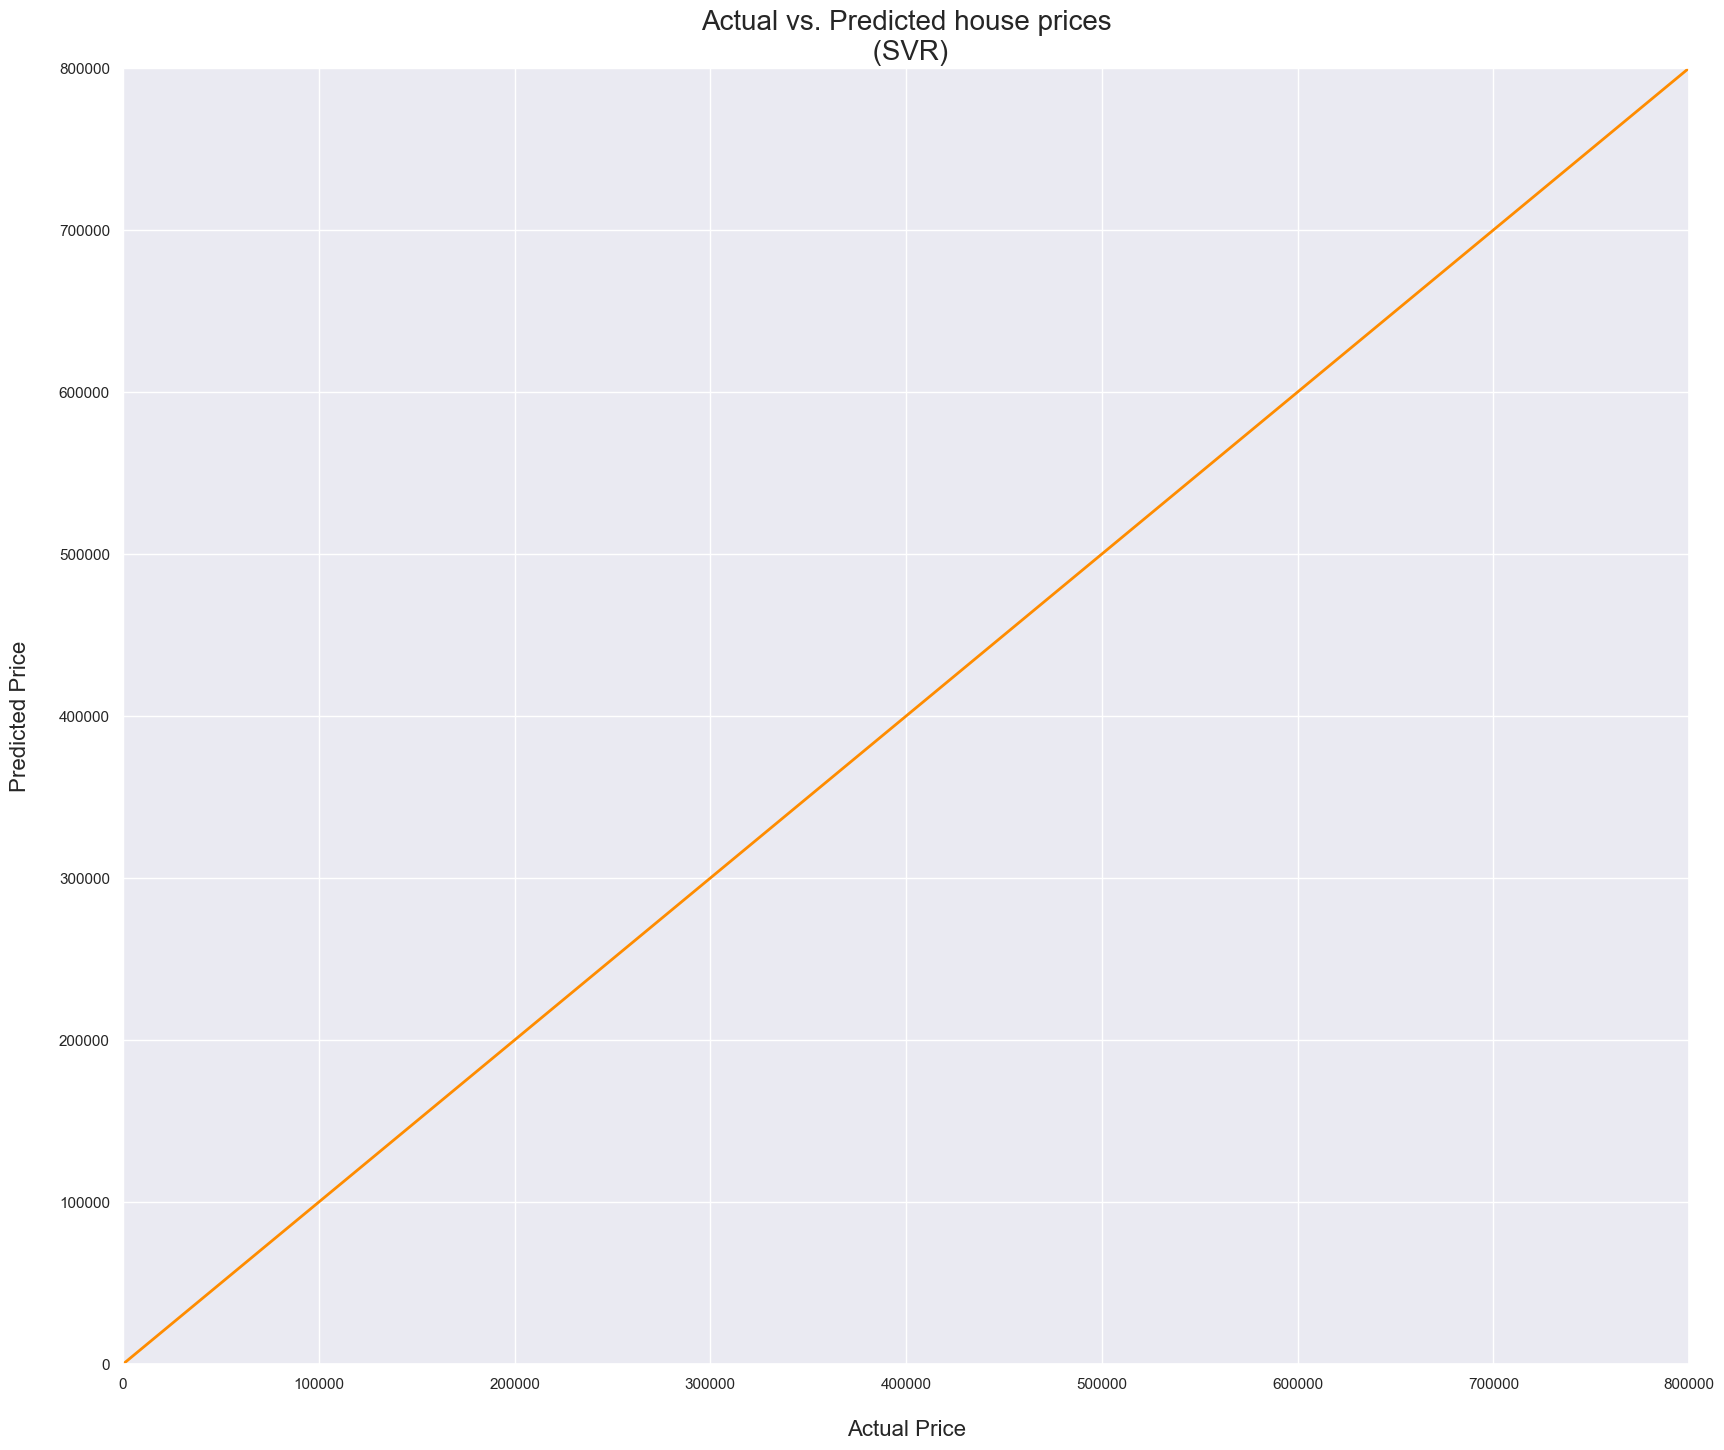

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (SVR)", fontsize = 20)
plt.scatter(np.exp(y_test), np.exp(y_pred_svr),
            color = "deepskyblue", marker = "o", facecolors = "none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw = 2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

# 7. Best Model Prediction
#### For now

In [ ]:
Prediction_with_bestmodel = np.exp(model_Lasso.predict(new_test))

output = pd.DataFrame({"Id": Test_ID, "SalePrice": Prediction_with_bestmodel})

output.head(10)

Id  SalePrice
0  1461 116,482.22
1  1462 152,182.02
2  1463 179,219.57
3  1464 201,701.14
4  1465 203,806.13
5  1466 179,232.78
6  1467 179,217.12
7  1468 168,746.42
8  1469 215,908.95
9  1470 119,498.60

In [ ]:
# output.to_csv("submission.csv", index = False)